In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix


import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

In [4]:
data = 'data.csv'

df = pd.read_csv(data,header=0)


In [5]:
# get the dimenions of data
df.shape


(569, 33)

In [256]:
df.head()



id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [257]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [258]:
null_feat = pd.DataFrame(len(df['id']) - df.isnull().sum(), columns = ['Count'])

trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, marker=dict(color = '#0c2061',
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  "Missing Values")
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [259]:
list = ['Unnamed: 32','id']
df.drop(list,axis = 1 ,inplace=True )
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [260]:
M = df[(df['diagnosis'] == "M")]
B = df[(df['diagnosis'] == "B")]

trace = go.Bar(x = (len(M), len(B)), y = ['malignant', 'benign'], orientation = 'h', opacity = 0.8, marker=dict(
        color=[ 'red', 'green'],
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  'Count of diagnosis variable')
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

#------------PERCENTAGE-------------------
trace = go.Pie(labels = ['benign','malignant'], values = df['diagnosis'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['green', 'red'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of diagnosis variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

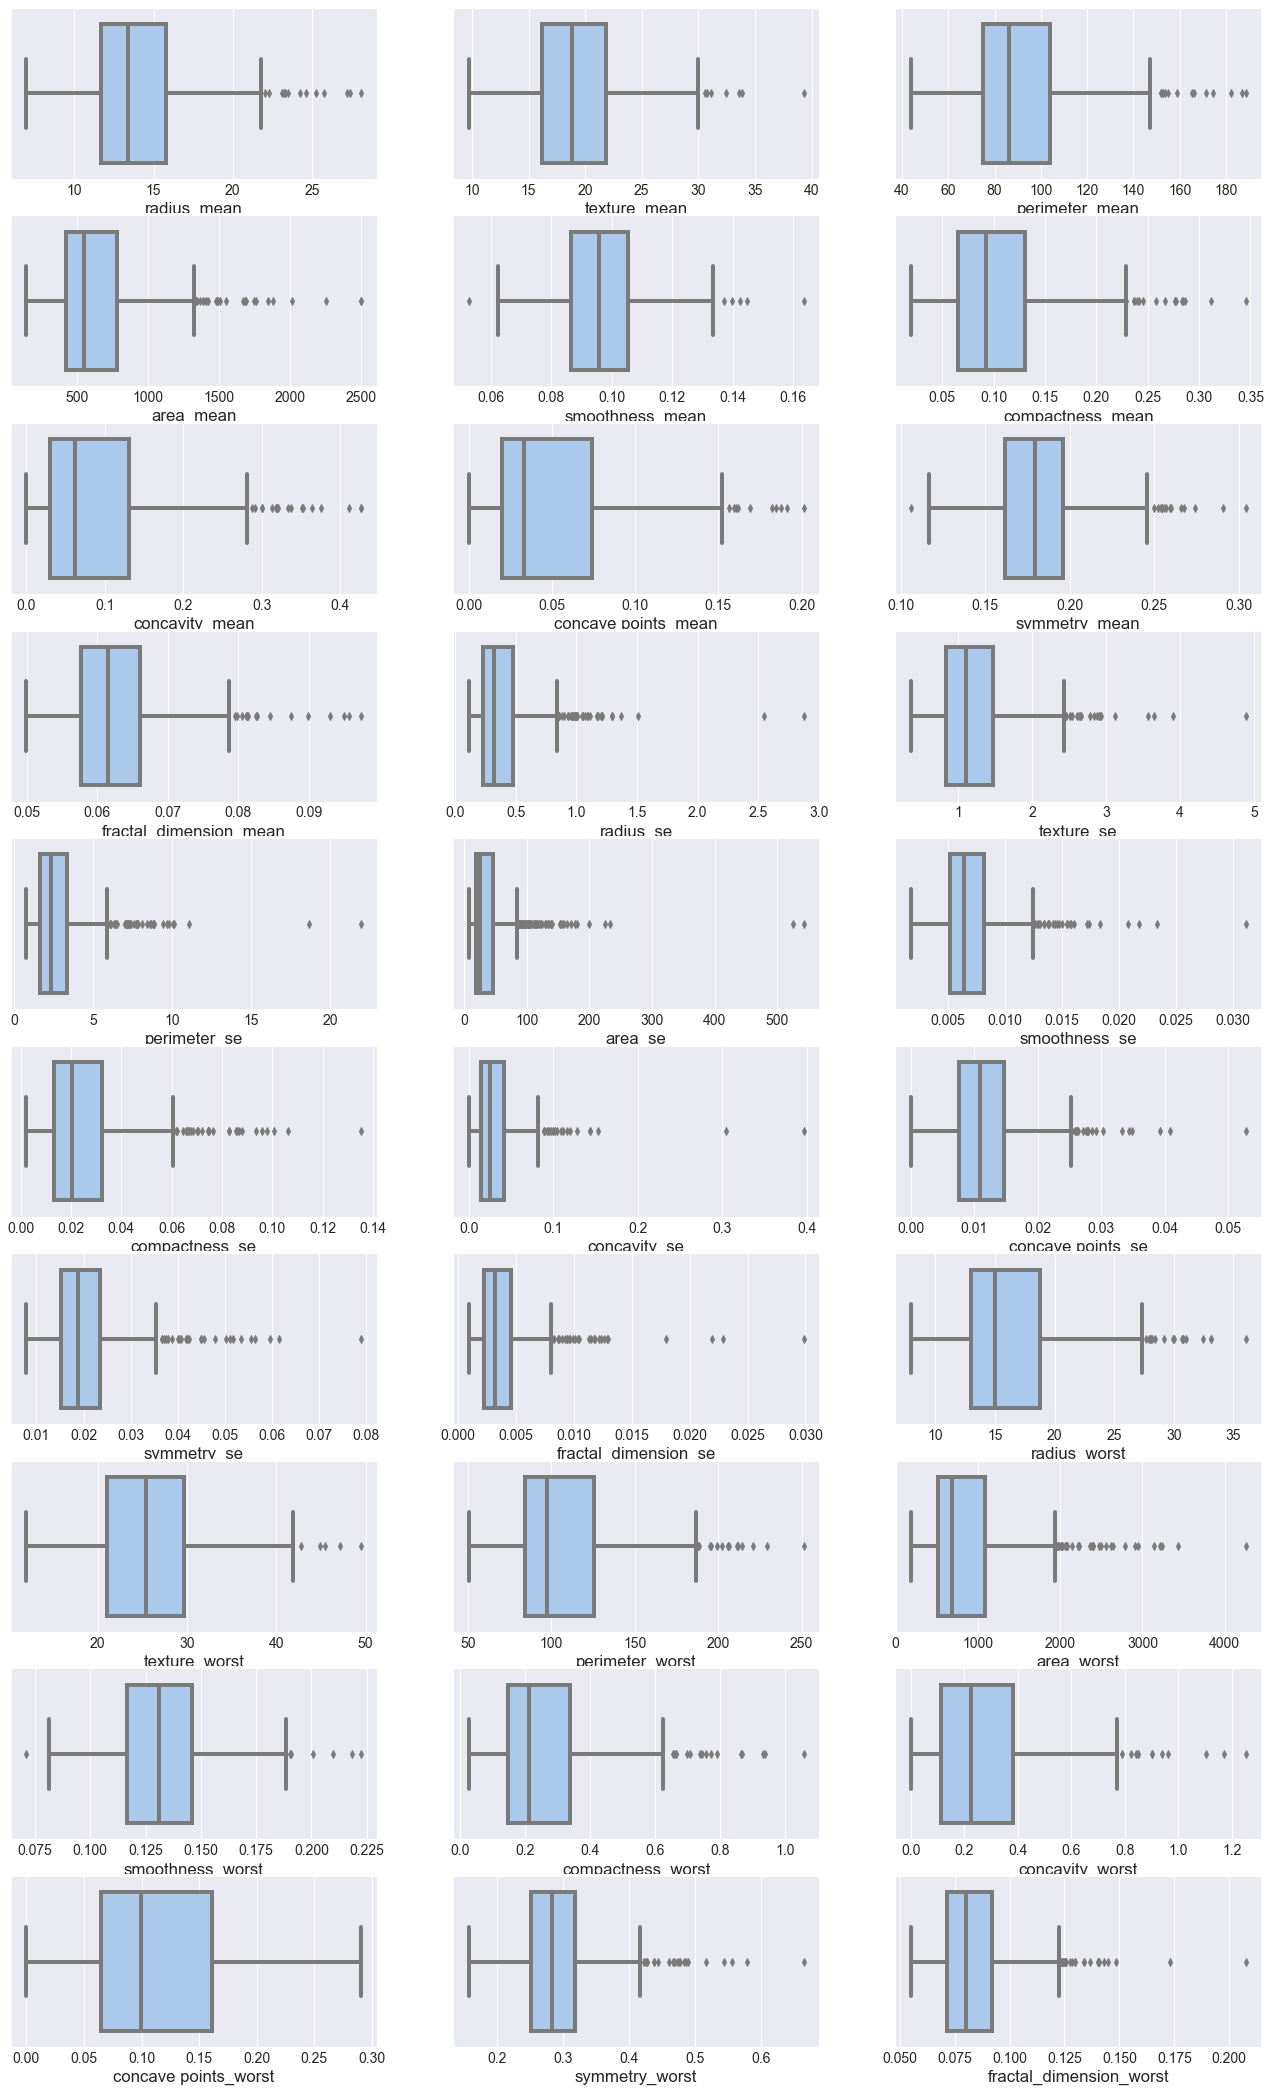

In [261]:
#outliers way 1 
plt.figure(figsize=(20,35))
plotnumber =1
for column in df.columns[1:]:
    ax = plt.subplot(10,3,plotnumber)
    sns.boxplot(data = df, x = column, palette='pastel')
    plt.xlabel(column)
    plotnumber+=1
plt.show()


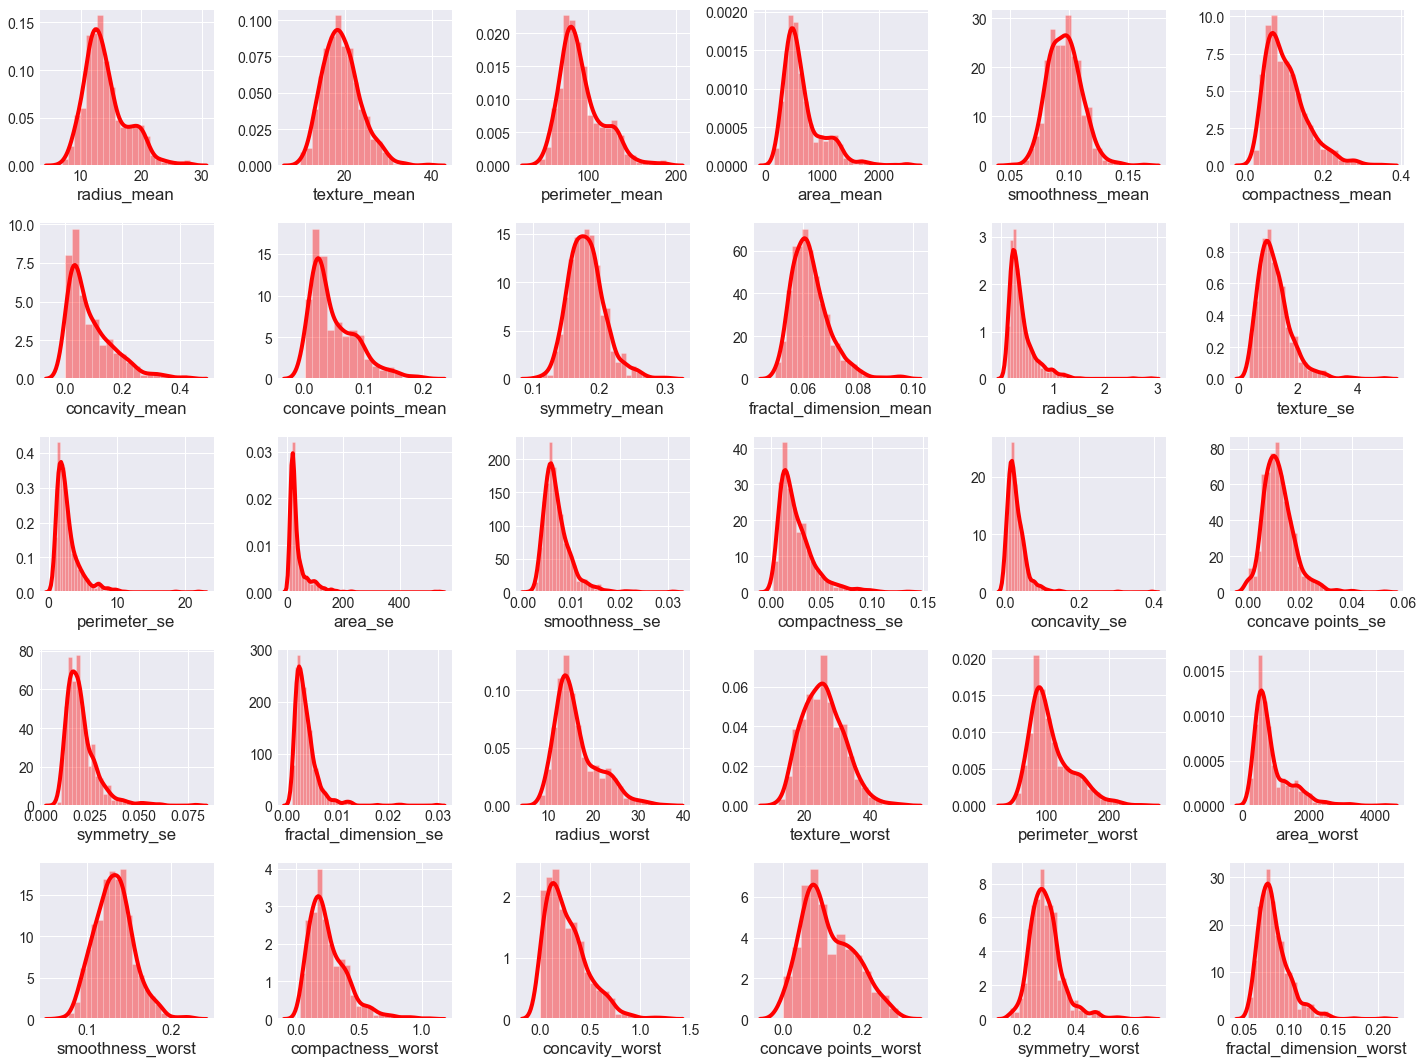

In [262]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df.columns[1:]:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.distplot(df[column],color='red')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [263]:



# I want to thanks @masumrumi for sharing this amazing plot!
def plotting_3_chart(df, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    import scipy
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );





In [264]:
def fix_skew(features):
    """
    This function takes in a dataframe and return fixed skewed dataframe
    """
    ## Import necessary modules
    from scipy import stats
    from scipy.special import boxcox1p
    from scipy.stats import boxcox_normmax
    
    ## Getting all the data that are not of "object" type.
    
    numerical_columns = features.select_dtypes(include=['int64','float64']).columns

    # Check the skew of all numerical features
    skewed_features = features[numerical_columns].apply(lambda x: stats.skew(x)).sort_values(ascending=False)
    high_skew = skewed_features[abs(skewed_features) > 0.5]
    skewed_features = high_skew.index

    # Perform the Box-Cox transformation
    for column in skewed_features:
        features[column] = boxcox1p(features[column], boxcox_normmax(features[column] + 1))
        
    return features




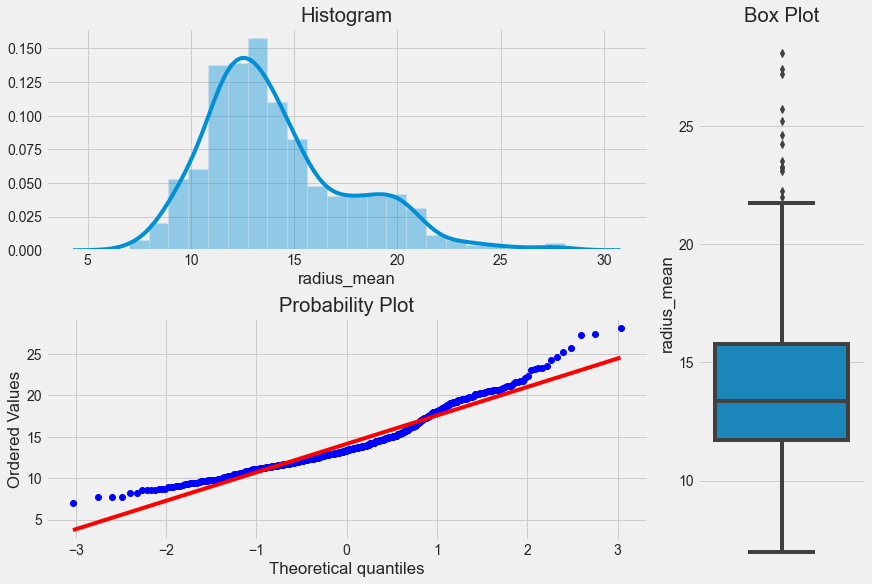

In [265]:


plotting_3_chart(df, 'radius_mean')


In [266]:




df_skew = fix_skew(df)


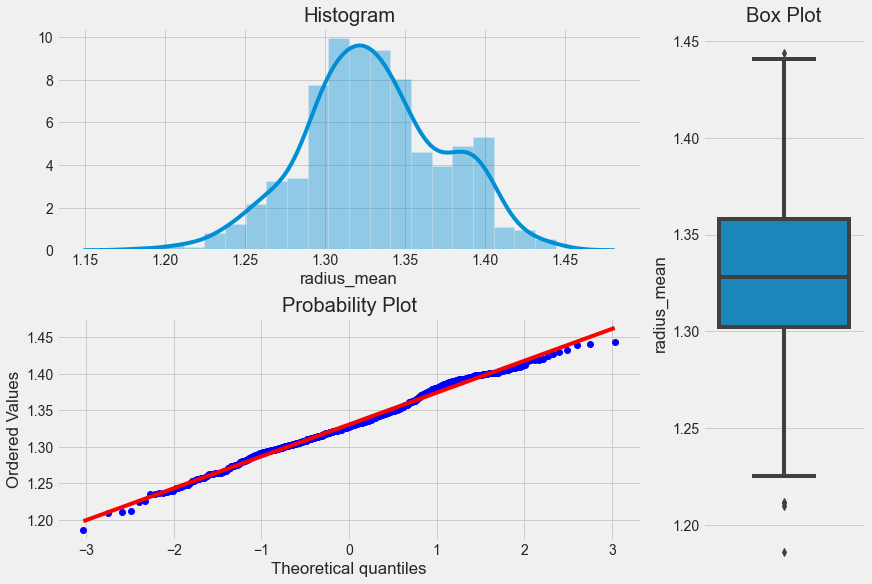

In [267]:


plotting_3_chart(df, 'radius_mean')

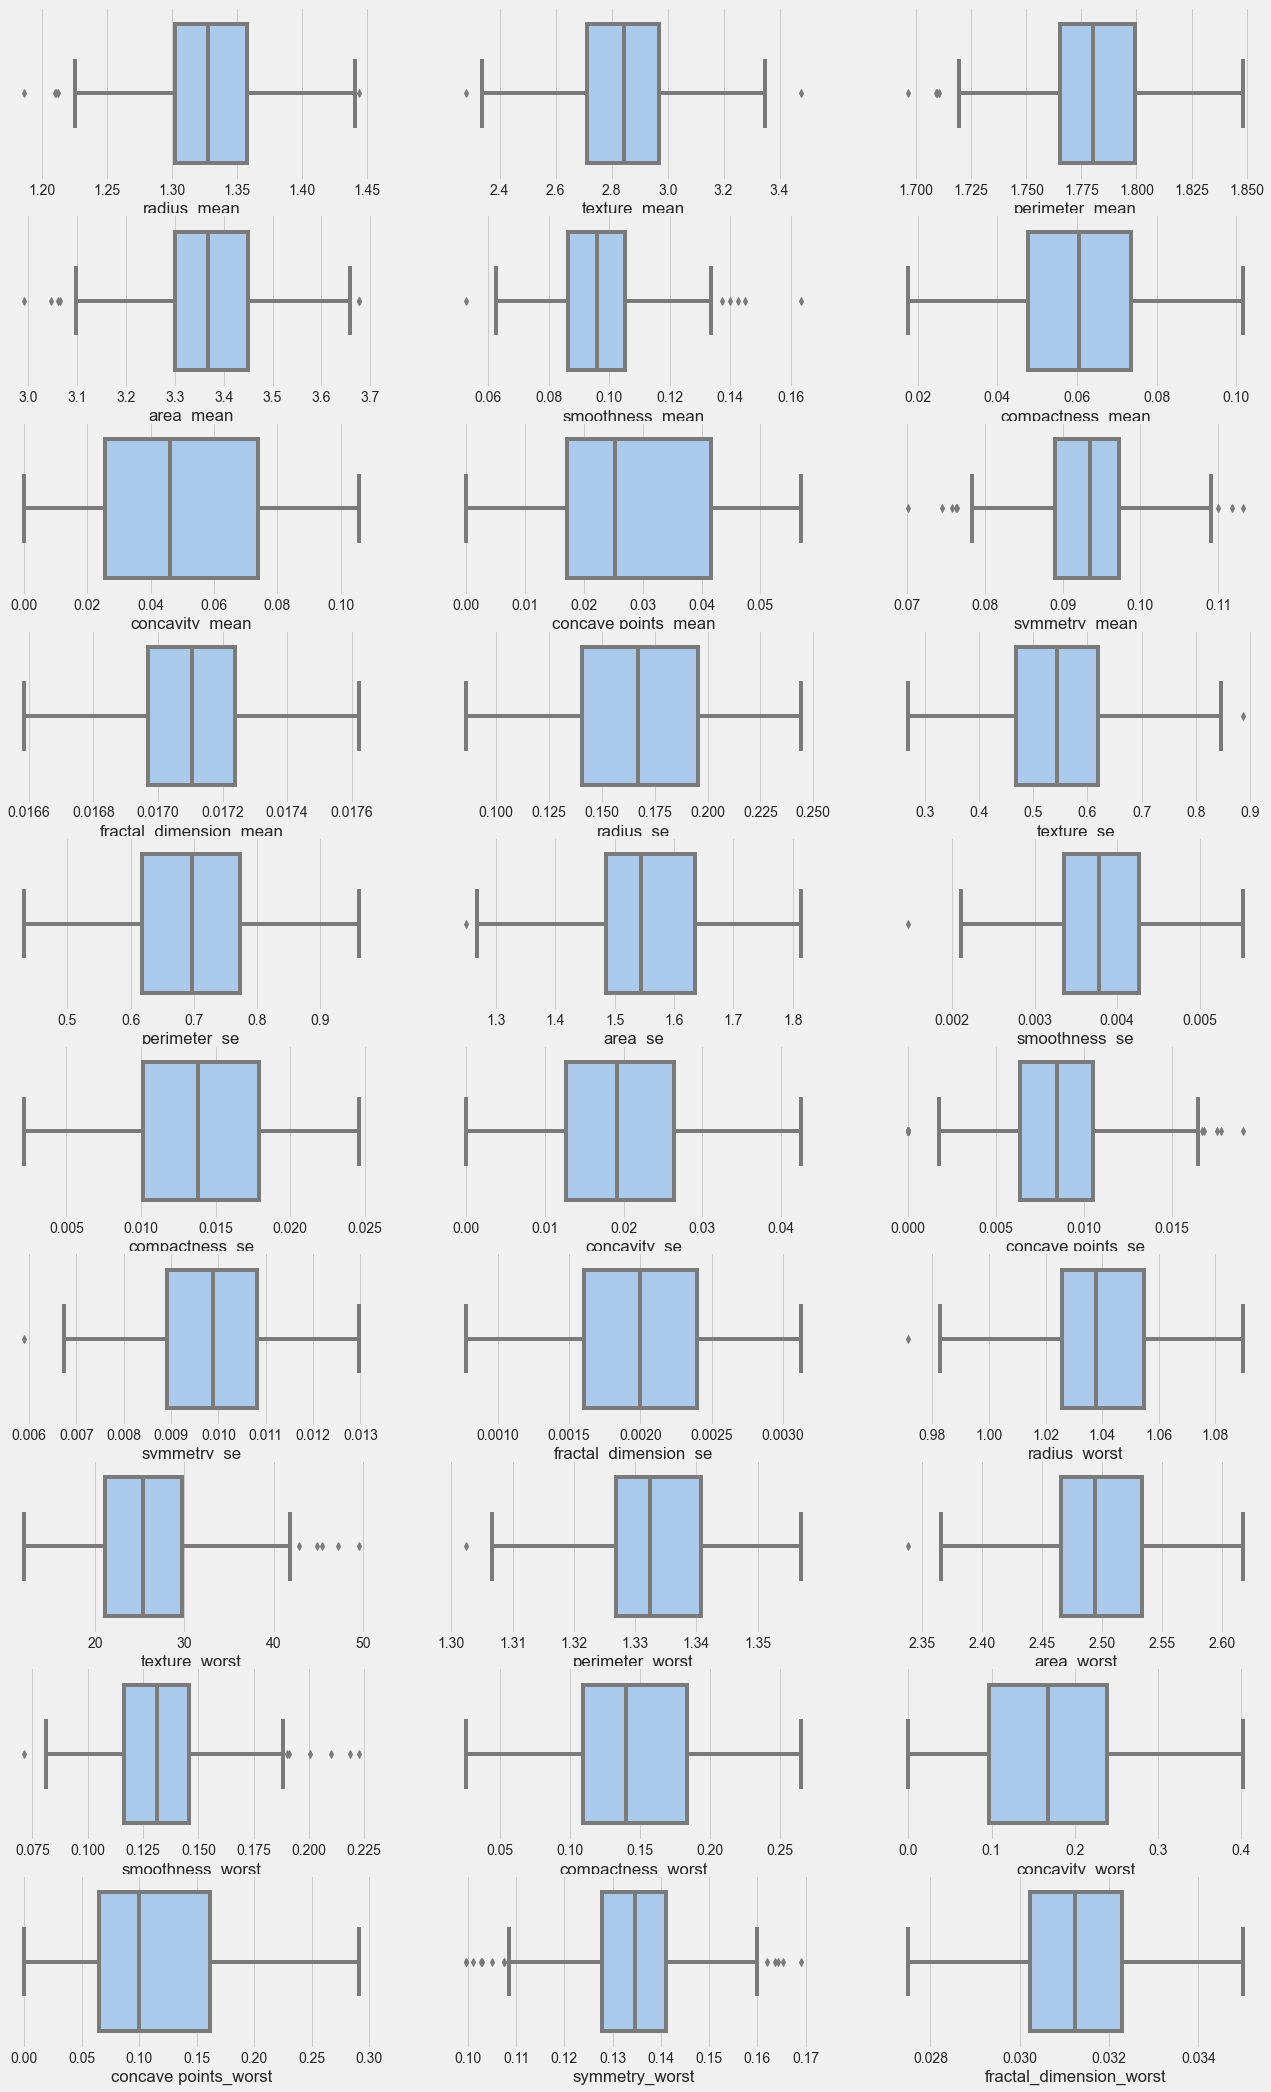

In [268]:
#outliers way 1 
plt.figure(figsize=(20,35))
plotnumber =1
for column in df.columns[1:]:
    ax = plt.subplot(10,3,plotnumber)
    sns.boxplot(data = df, x = column, palette='pastel')
    plt.xlabel(column)
    plotnumber+=1
plt.show()



In [269]:
def outlierLimit(column):
    q1, q3 = np.nanpercentile(column, [25, 75])
    iqr = q3 - q1
    
    upLimit = q3 + 1.5 * iqr
    loLimit = q1 - 1.5 * iqr
    
    return upLimit, loLimit

In [270]:
for column in df.columns:
    if df[column].dtype != 'object':
        upLimit, loLimit = outlierLimit(df[column])
        df[column] = np.where((df[column] > upLimit) | (df[column] < loLimit), np.nan, df[column])

In [272]:
df.isnull().sum()

diagnosis                   0
radius_mean                 5
texture_mean                2
perimeter_mean              4
area_mean                   6
smoothness_mean             6
compactness_mean            0
concavity_mean              0
concave points_mean         0
symmetry_mean               8
fractal_dimension_mean      0
radius_se                   0
texture_se                  1
perimeter_se                0
area_se                     1
smoothness_se               1
compactness_se              0
concavity_se                0
concave points_se          18
symmetry_se                 1
fractal_dimension_se        0
radius_worst                1
texture_worst               5
perimeter_worst             1
area_worst                  1
smoothness_worst            7
compactness_worst           0
concavity_worst             0
concave points_worst        0
symmetry_worst             13
fractal_dimension_worst     0
dtype: int64

In [273]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=4)
df.iloc[:,1:30] = imputer.fit_transform(df.iloc[:,1:30])

In [274]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [275]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M     1.379801      2.335729        1.814385   3.502532   
1         M     1.400684      2.793265        1.821226   3.559907   
2         M     1.394031      2.947044        1.819343   3.540450   
3         M     1.297426      2.911060        1.768960   3.278973   
4         M     1.398615      2.609675        1.822614   3.555525   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         0.118400          0.097440        0.099930             0.053693   
1         0.084740          0.054564        0.058443             0.040523   
2         0.109600          0.081022        0.088651             0.051736   
3         0.099782          0.097948        0.094639             0.048512   
4         0.100300          0.074257        0.088748             0.048359   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0       0.105545  ...      1.073374          17.33         1.350790   
1       0.093968  ...      1.072531          23.41         1.347178   
2       0.099490  ...      1.069246          25.53         1.346139   
3       0.108098  ...      1.037534          26.50         1.332921   
4       0.093897  ...      1.066631          16.67         1.346087   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0    2.576504            0.1622           0.239648         0.329978   
1    2.574504            0.1238           0.129145         0.175798   
2    2.565726            0.1444           0.204112         0.262666   
3    2.475456            0.1313           0.255763         0.324862   
4    2.560204            0.1374           0.137439         0.245195   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654        0.157774                 0.033727  
1                0.1860        0.133168                 0.032057  
2                0.2430        0.147358                 0.031937  
3                0.2575        0.135405                 0.034792  
4                0.1625        0.124499                 0.030877  

[5 rows x 31 columns]

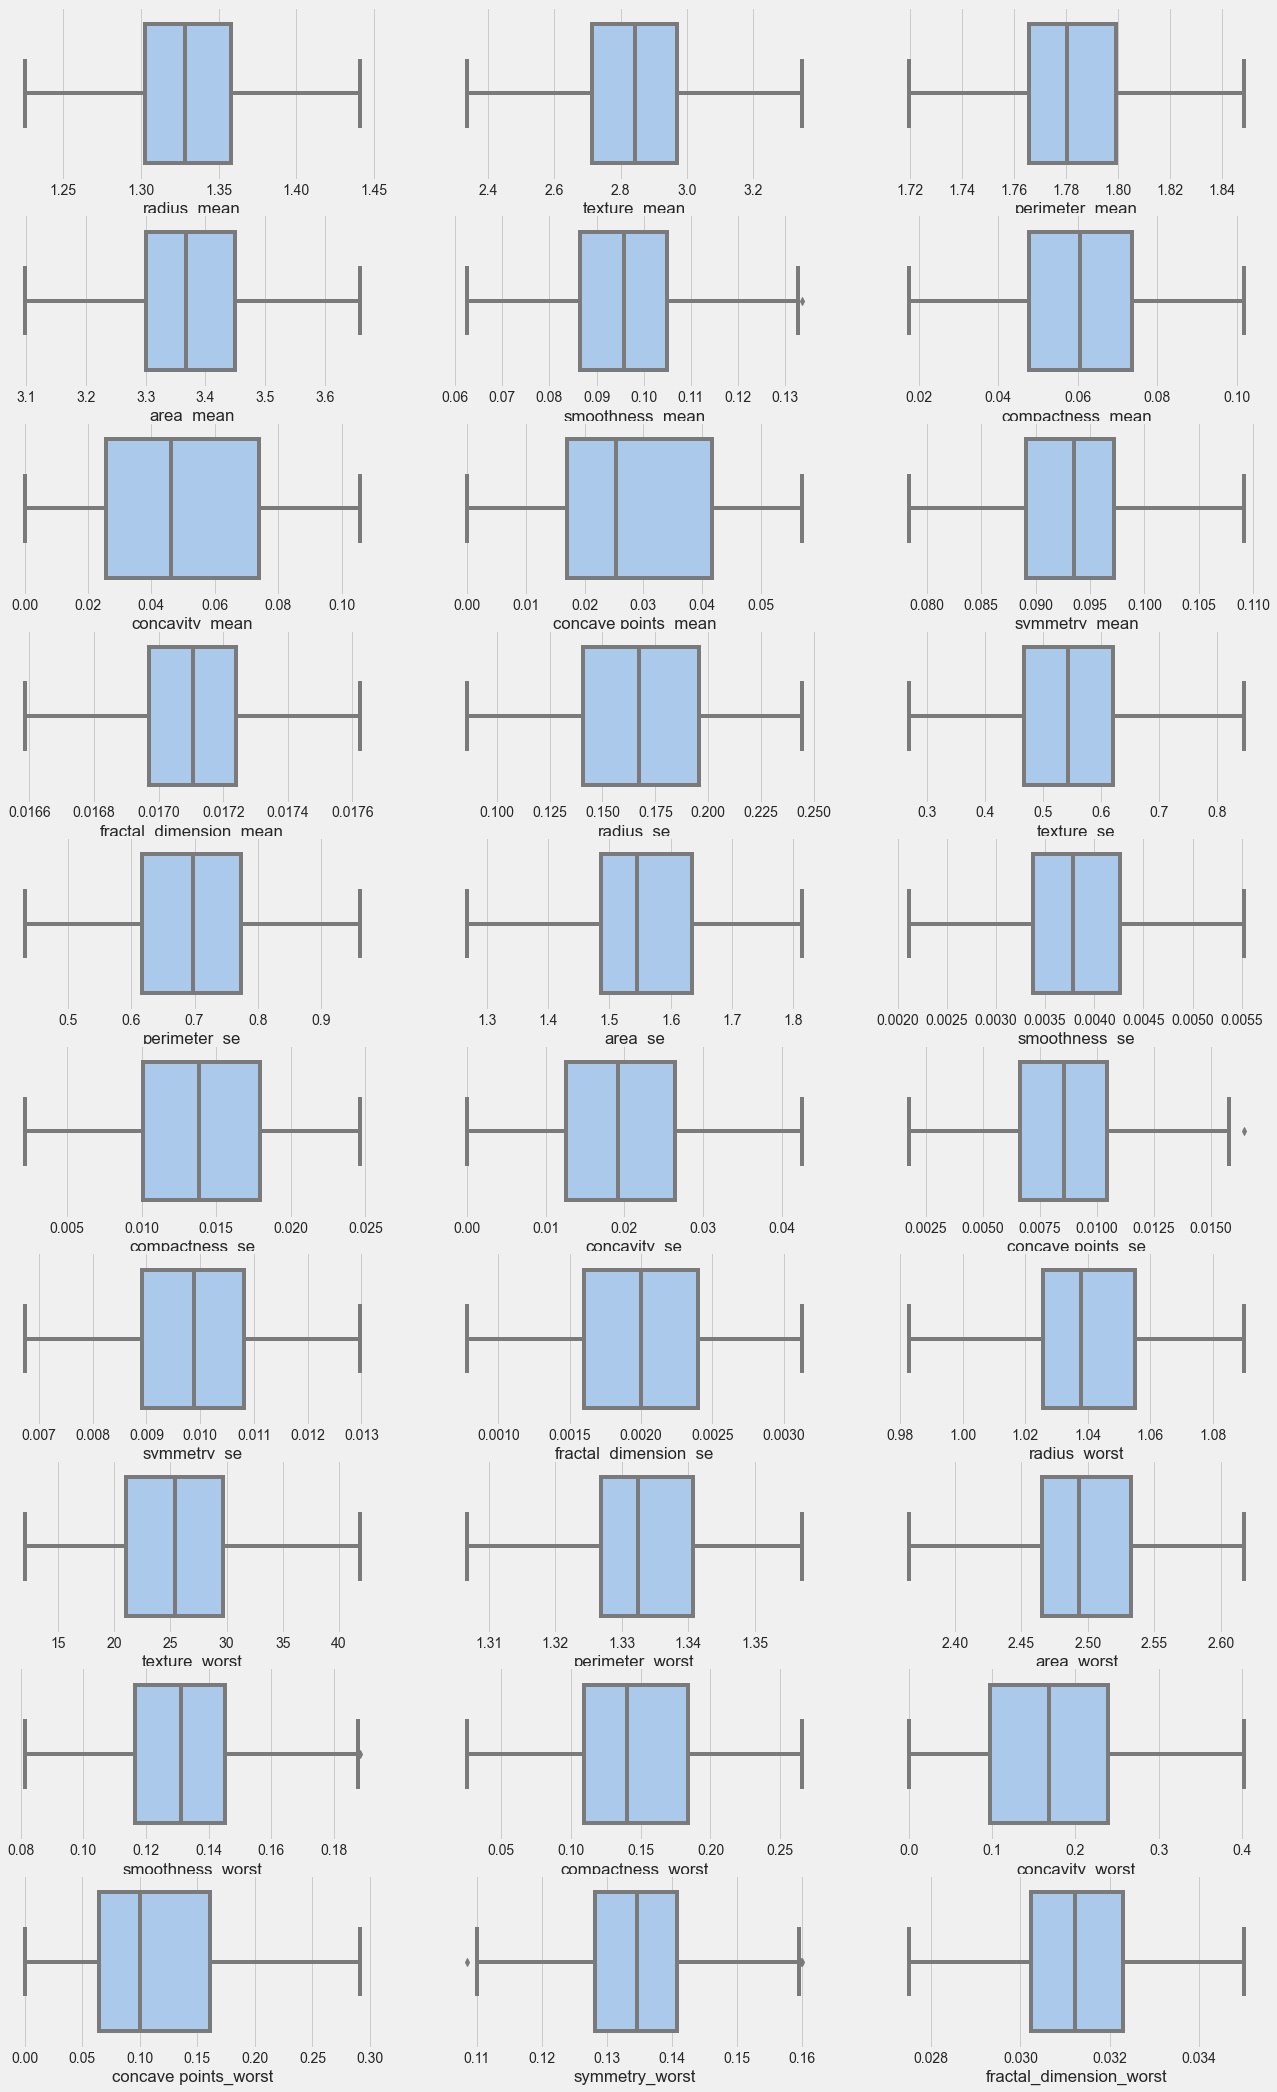

In [276]:
#outliers way 1 
plt.figure(figsize=(20,35))
plotnumber =1
for column in df.columns[1:]:
    ax = plt.subplot(10,3,plotnumber)
    sns.boxplot(data = df, x = column, palette='pastel')
    plt.xlabel(column)
    plotnumber+=1
plt.show()



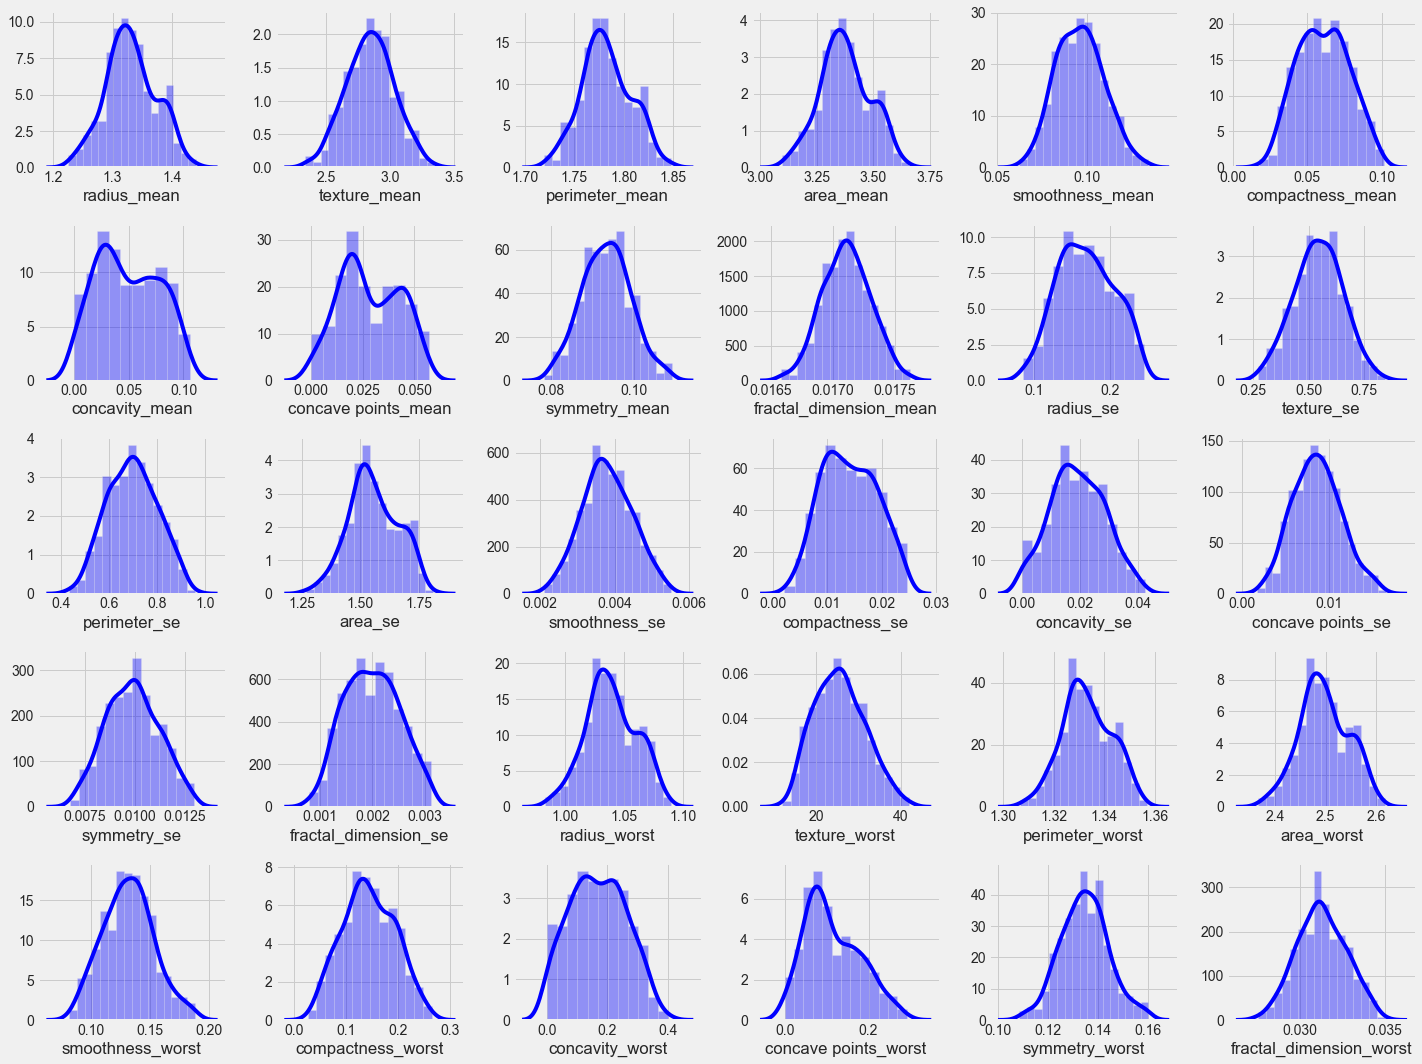

In [277]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df.columns[1:]:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.distplot(df[column],color='blue')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()


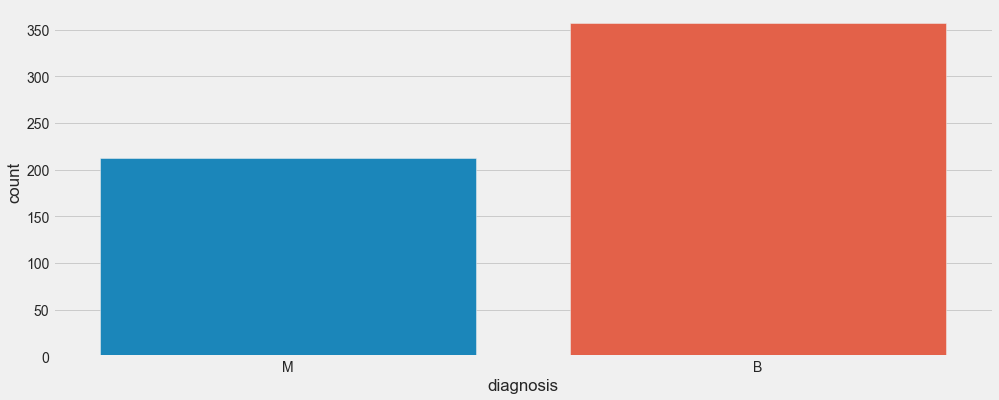

In [278]:



sns.countplot(df['diagnosis'],label="Count")

In [279]:

#Lable ENcoding 
#1= Malignant (Cancerous) - Positive (M)
#0= Benign (Not Cancerous) -Negative (B)


df.diagnosis.replace({"B":0,"M":1},inplace=True)
df.diagnosis.unique()



array([1, 0], dtype=int64)

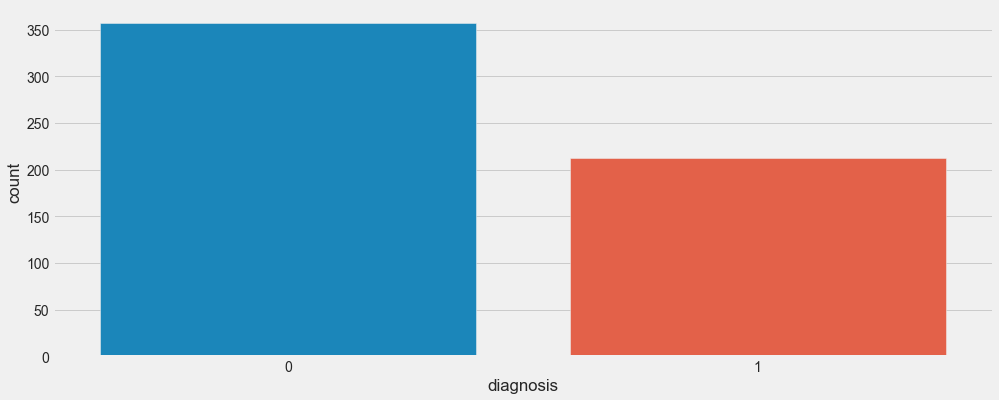

In [280]:



sns.countplot(df['diagnosis'],label="Count")

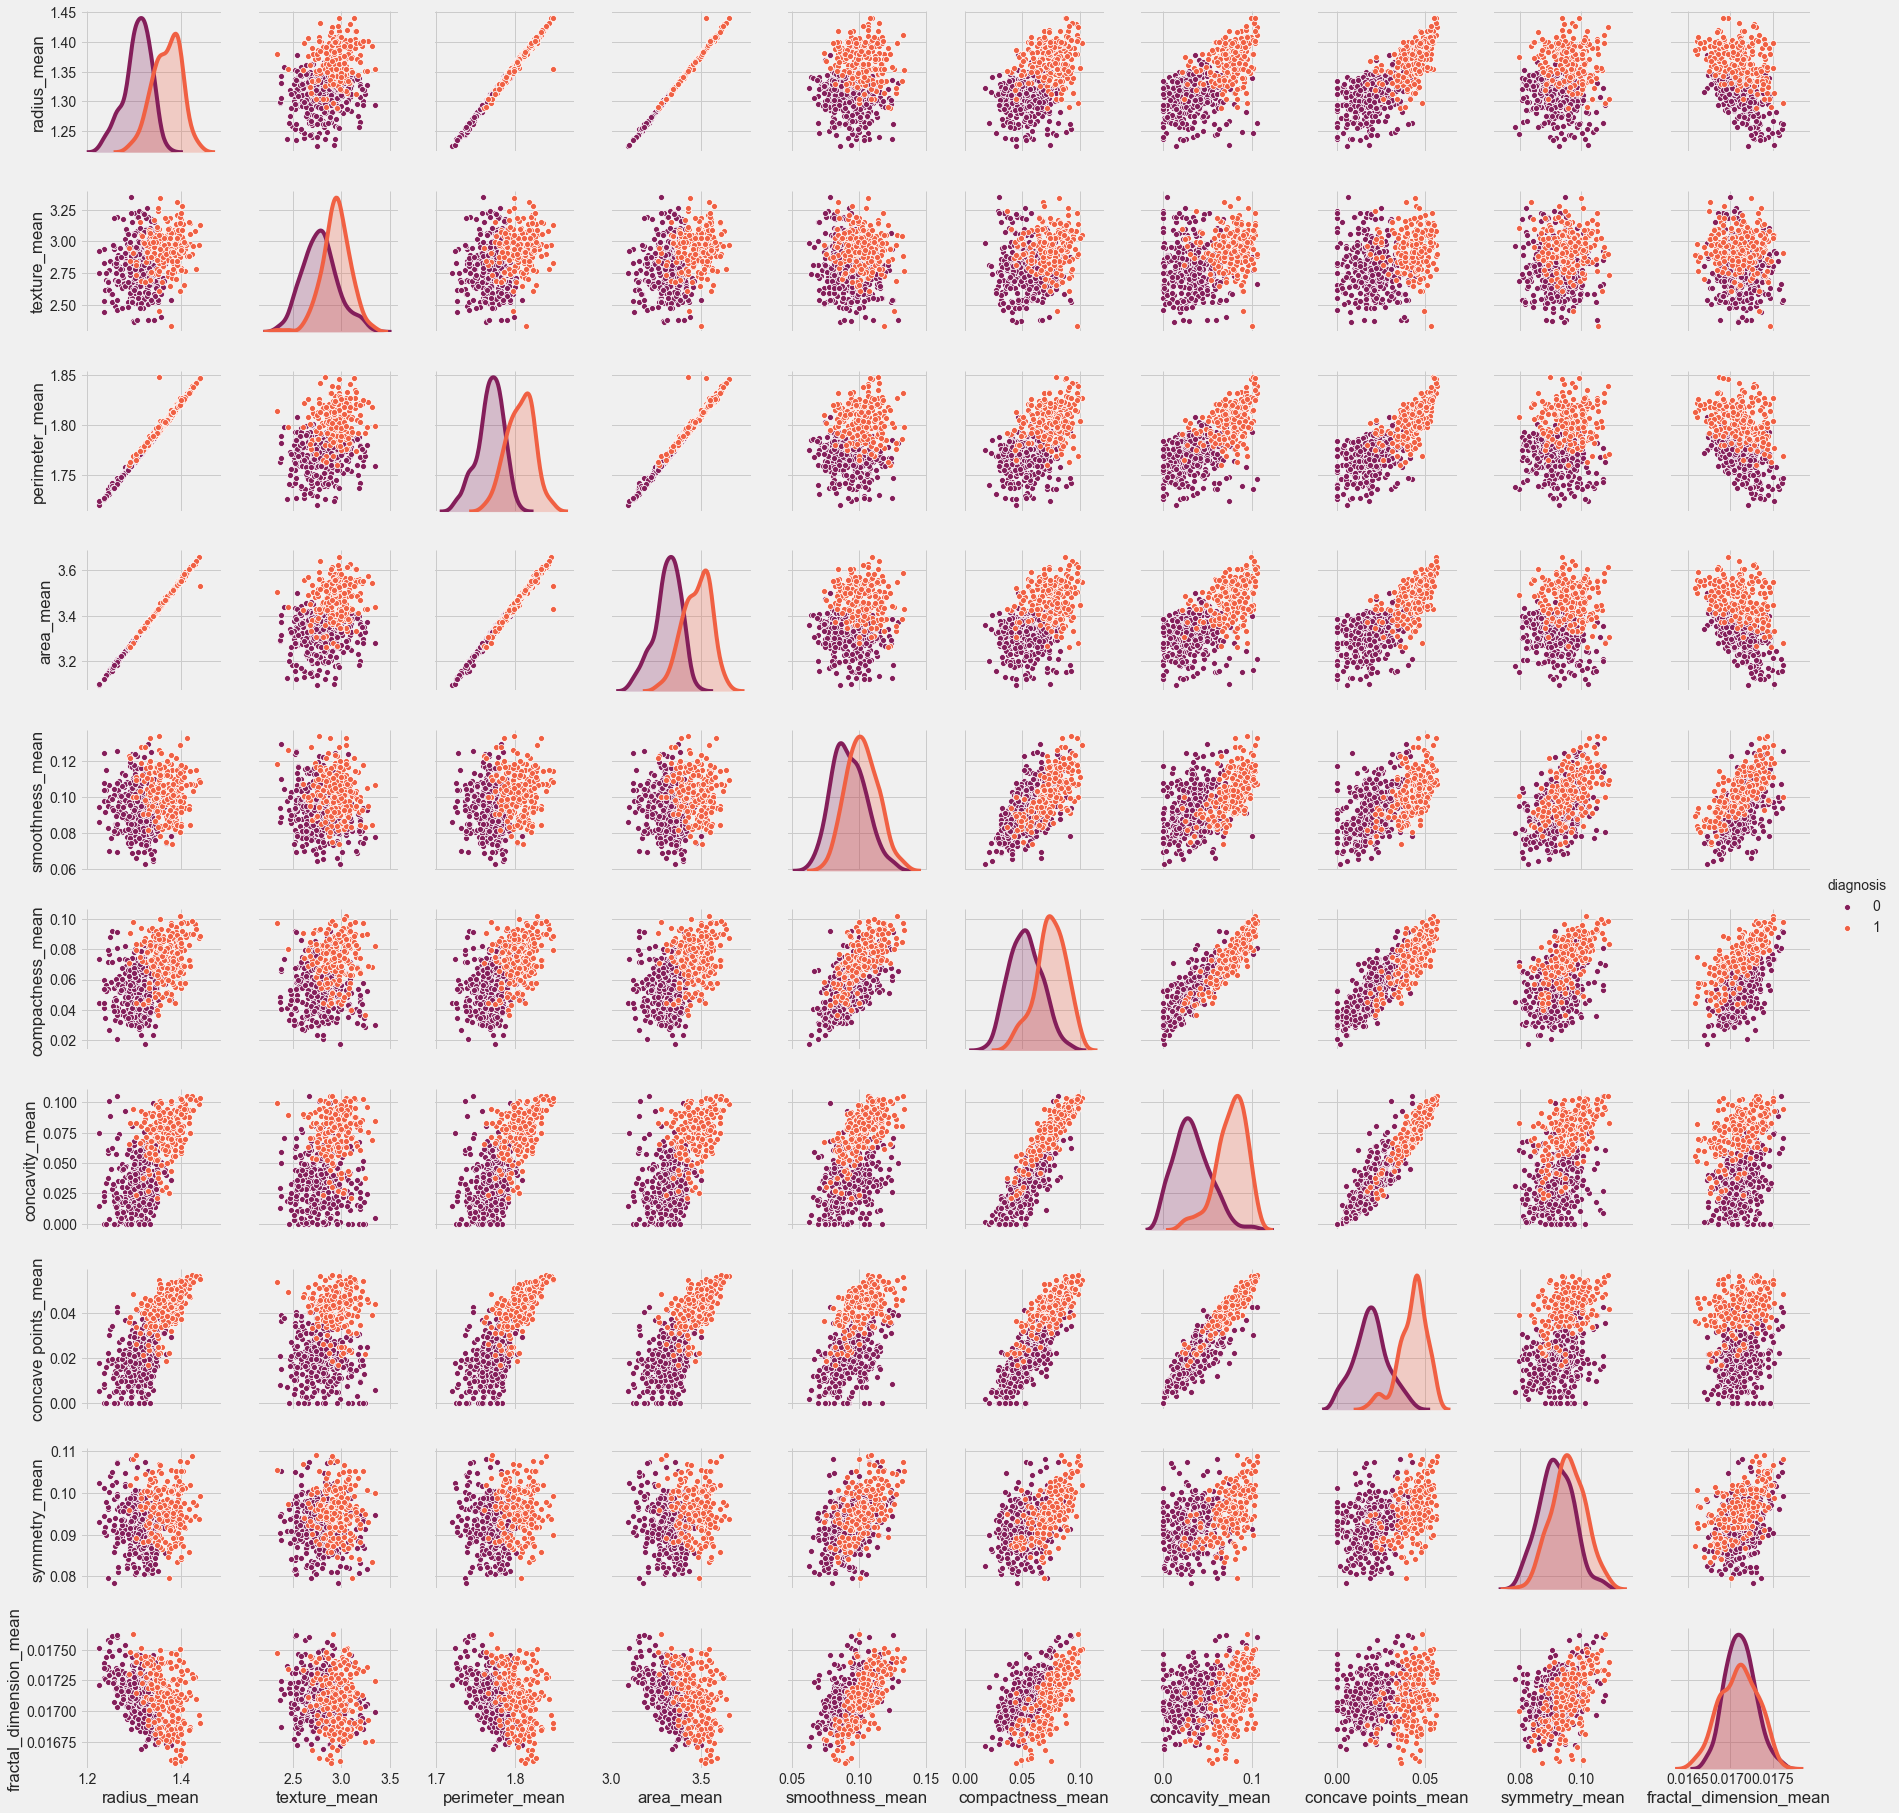

In [157]:

sns.pairplot(data=df.iloc[:, :11], hue="diagnosis", palette='rocket')



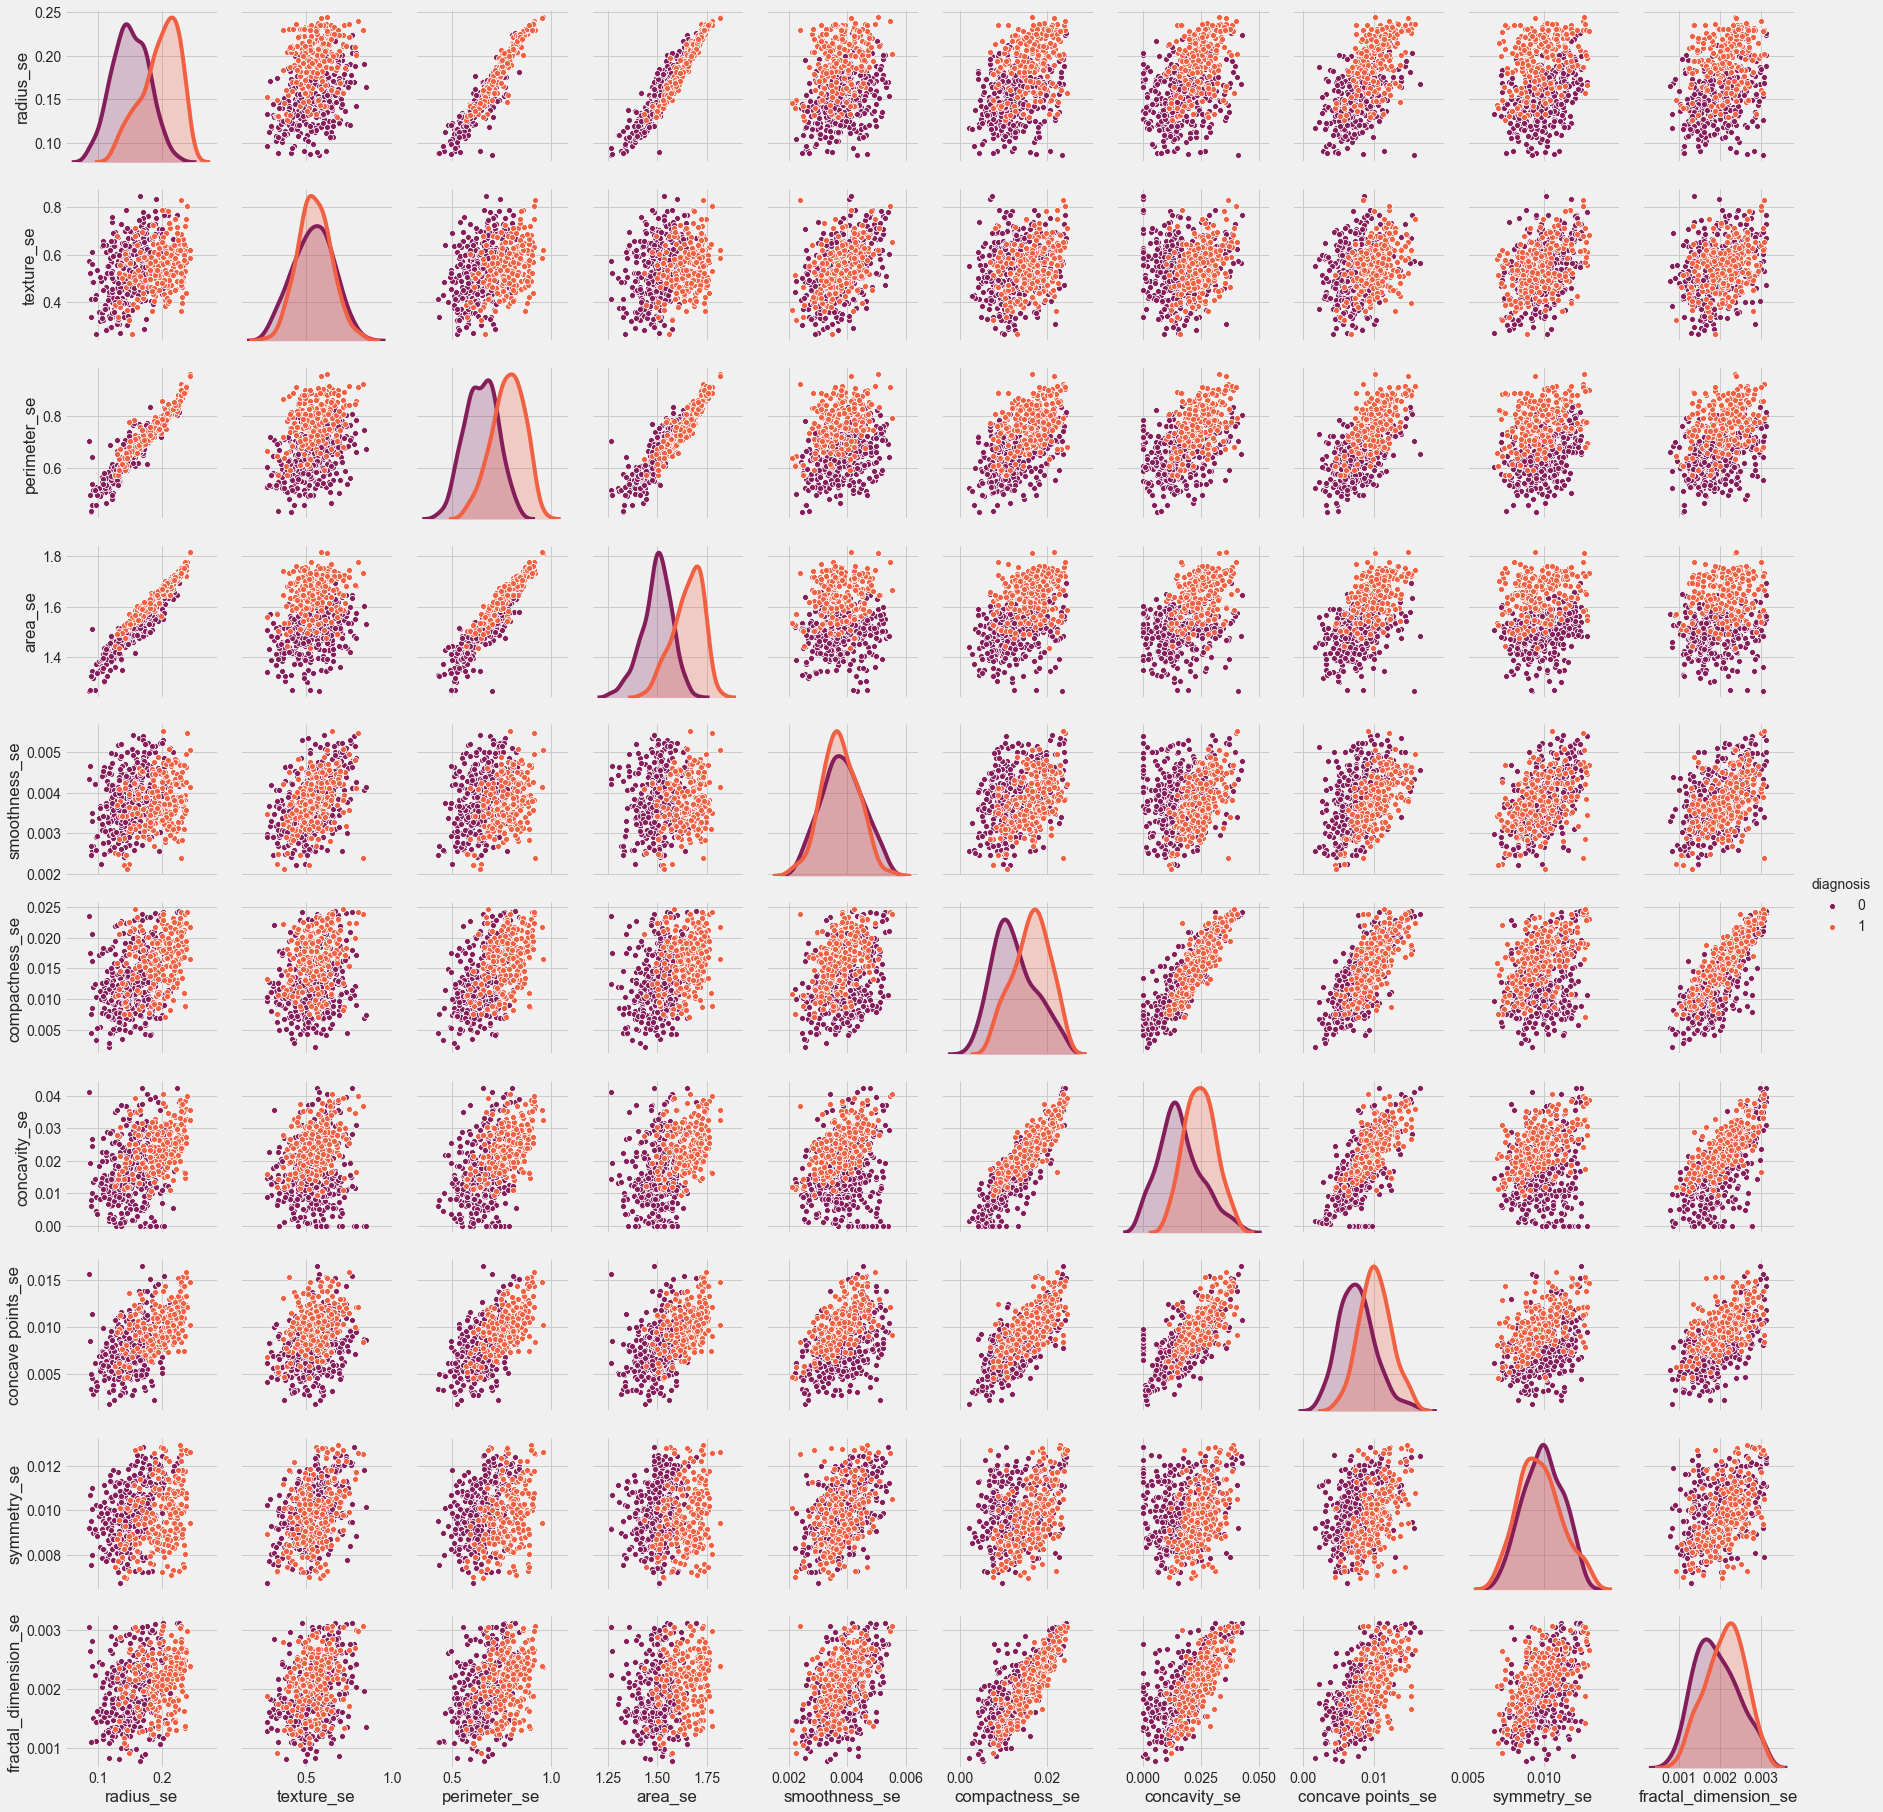

In [158]:
#sns.pairplot(data=df.iloc[:,10:20], hue="diagnosis", palette='rocket')

columns = ['diagnosis', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
           'concavity_se','concave points_se', 'symmetry_se', 'fractal_dimension_se']

sns.pairplot(data=df[columns], hue="diagnosis", palette='rocket')


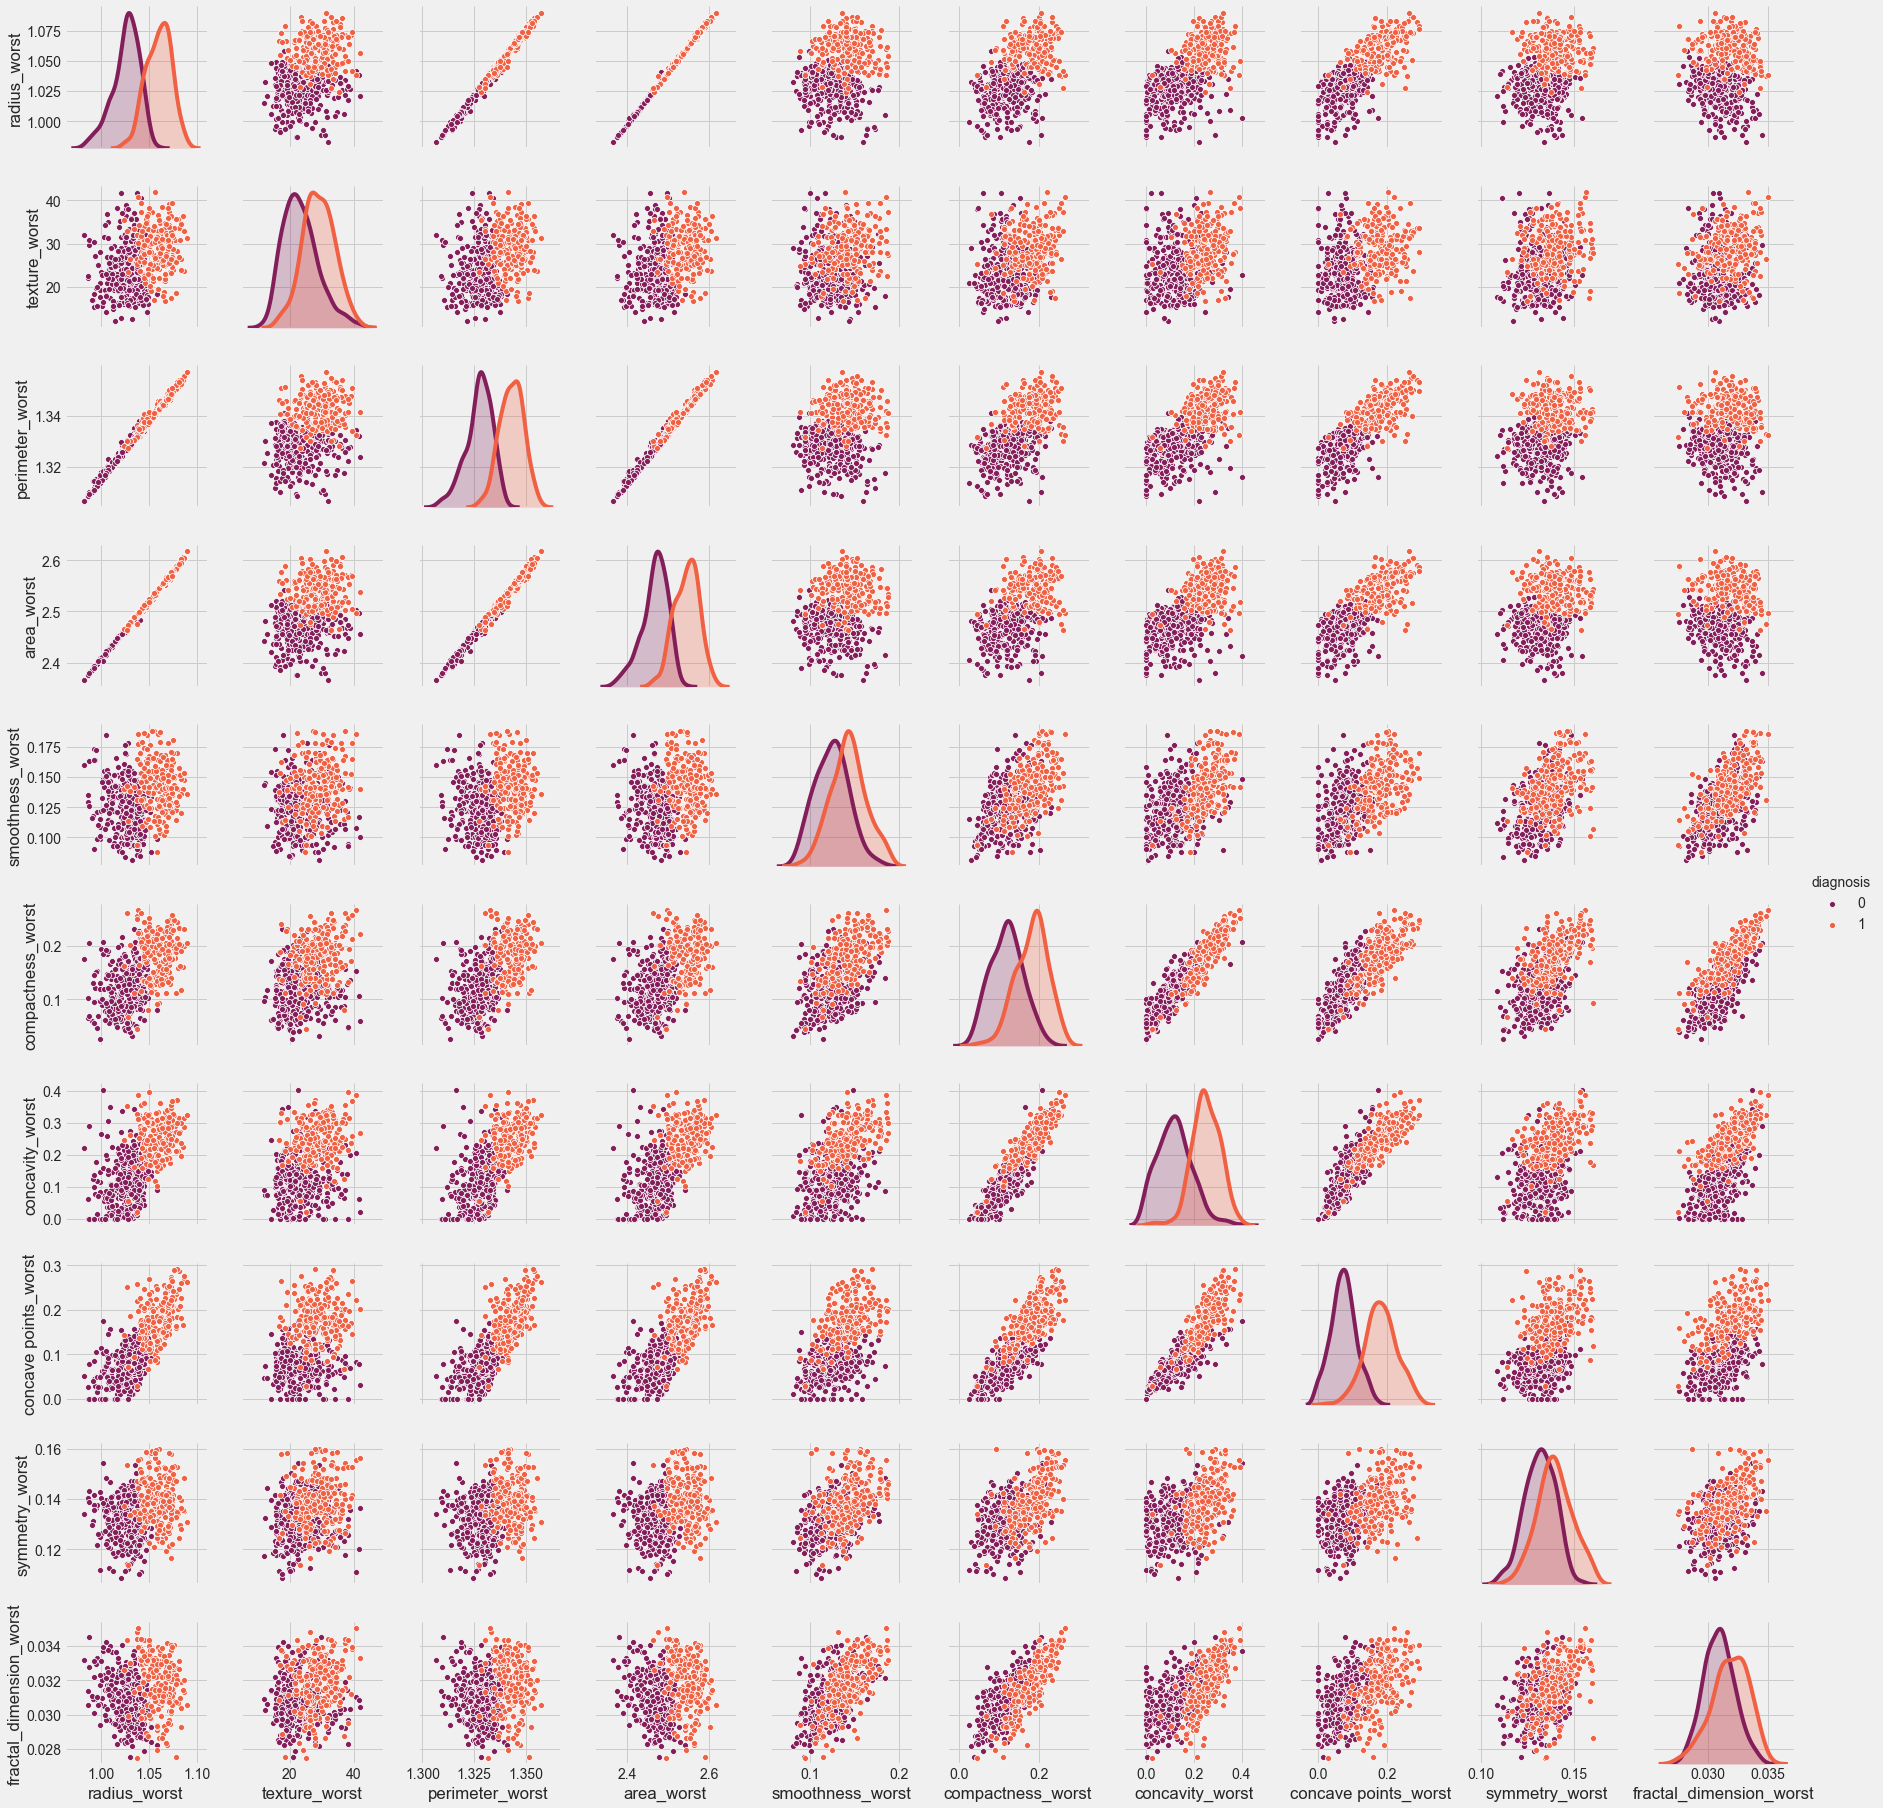

In [159]:
#sns.pairplot(data=df.iloc[:,20:30], hue="diagnosis", palette='rocket')

columns = ['diagnosis', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
           'compactness_worst','concavity_worst','concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

sns.pairplot(data=df[columns], hue="diagnosis", palette='rocket')


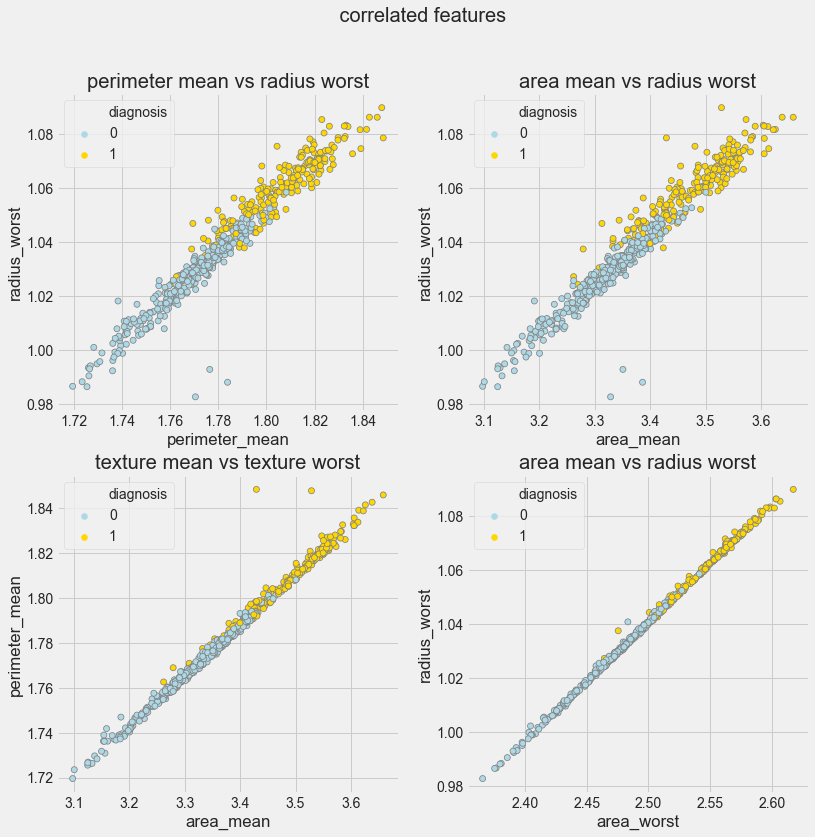

In [281]:

#seaborn version : 

palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'grey'

# Plot +
fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = df['perimeter_mean'], y = df['radius_worst'], hue = "diagnosis",
                    data = df, palette = palette, edgecolor=edgecolor)
plt.title('perimeter mean vs radius worst')
plt.subplot(222)
ax2 = sns.scatterplot(x = df['area_mean'], y = df['radius_worst'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs radius worst')
plt.subplot(223)
ax3 = sns.scatterplot(x = df['area_mean'], y = df['perimeter_mean'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('texture mean vs texture worst')
plt.subplot(224)
ax4 = sns.scatterplot(x = df['area_worst'], y = df['radius_worst'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs radius worst')

fig.suptitle(' correlated features', fontsize = 20)
plt.savefig('1')
plt.show()







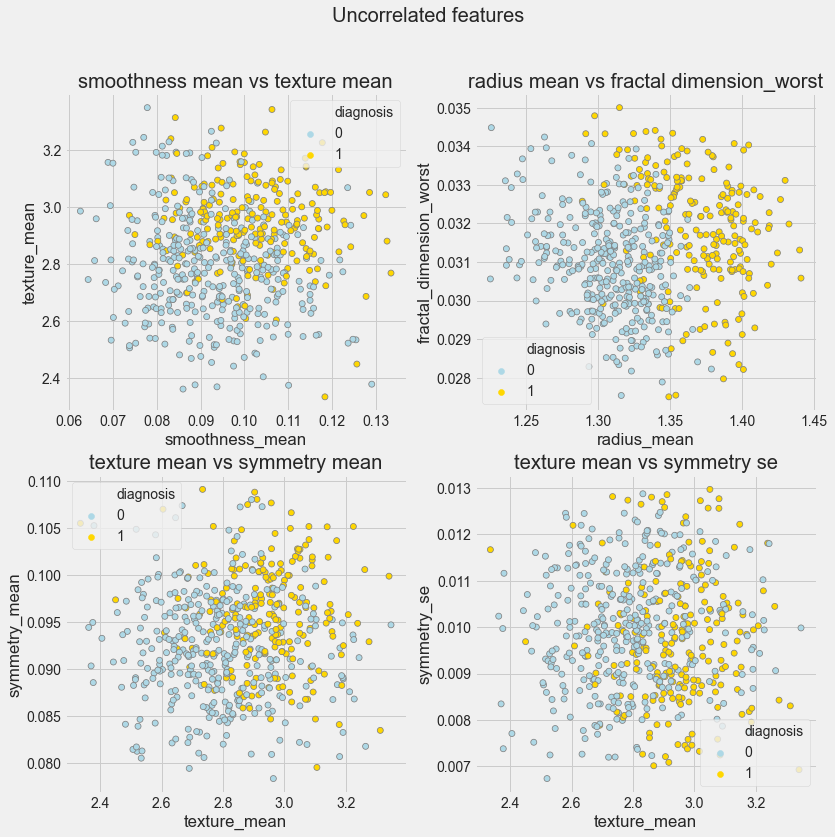

In [282]:



# seaborn version : 
fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = df['smoothness_mean'], y = df['texture_mean'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('smoothness mean vs texture mean')
plt.subplot(222)
ax2 = sns.scatterplot(x = df['radius_mean'], y = df['fractal_dimension_worst'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('radius mean vs fractal dimension_worst')
plt.subplot(223)
ax3 = sns.scatterplot(x = df['texture_mean'], y = df['symmetry_mean'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('texture mean vs symmetry mean')
plt.subplot(224)
ax4 = sns.scatterplot(x = df['texture_mean'], y = df['symmetry_se'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('texture mean vs symmetry se')

fig.suptitle('Uncorrelated features', fontsize = 20)
plt.savefig('2')
plt.show()


In [283]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1     1.379801      2.335729        1.814385   3.502532   
1          1     1.400684      2.793265        1.821226   3.559907   
2          1     1.394031      2.947044        1.819343   3.540450   
3          1     1.297426      2.911060        1.768960   3.278973   
4          1     1.398615      2.609675        1.822614   3.555525   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         0.118400          0.097440        0.099930             0.053693   
1         0.084740          0.054564        0.058443             0.040523   
2         0.109600          0.081022        0.088651             0.051736   
3         0.099782          0.097948        0.094639             0.048512   
4         0.100300          0.074257        0.088748             0.048359   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0       0.105545  ...      1.073374          17.33         1.350790   
1       0.093968  ...      1.072531          23.41         1.347178   
2       0.099490  ...      1.069246          25.53         1.346139   
3       0.108098  ...      1.037534          26.50         1.332921   
4       0.093897  ...      1.066631          16.67         1.346087   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0    2.576504            0.1622           0.239648         0.329978   
1    2.574504            0.1238           0.129145         0.175798   
2    2.565726            0.1444           0.204112         0.262666   
3    2.475456            0.1313           0.255763         0.324862   
4    2.560204            0.1374           0.137439         0.245195   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654        0.157774                 0.033727  
1                0.1860        0.133168                 0.032057  
2                0.2430        0.147358                 0.031937  
3                0.2575        0.135405                 0.034792  
4                0.1625        0.124499                 0.030877  

[5 rows x 31 columns]

Text(0.5, 1.0, 'Correlation Map')

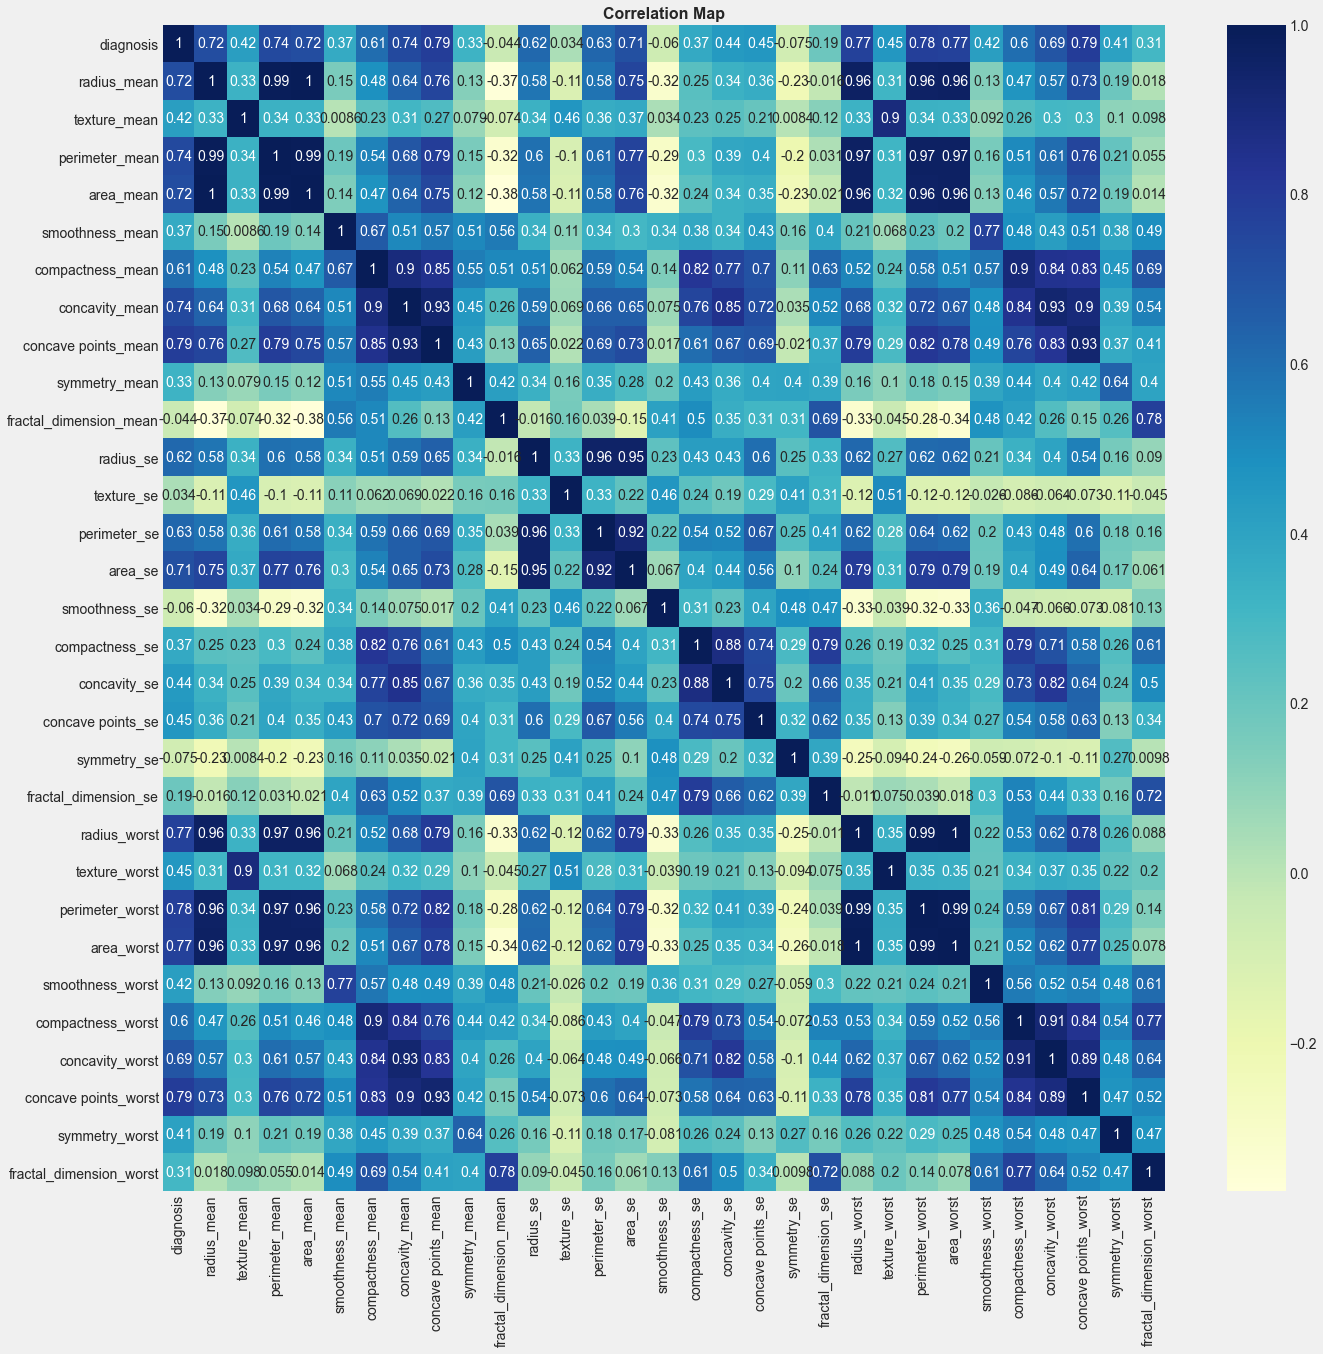

In [284]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap='YlGnBu', annot = True)
plt.title("Correlation Map", fontweight = "bold", fontsize=16)

In [285]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score

#for model building
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score


Text(0.5, 1.0, 'selected features after deleting the correlated unnecessary features')

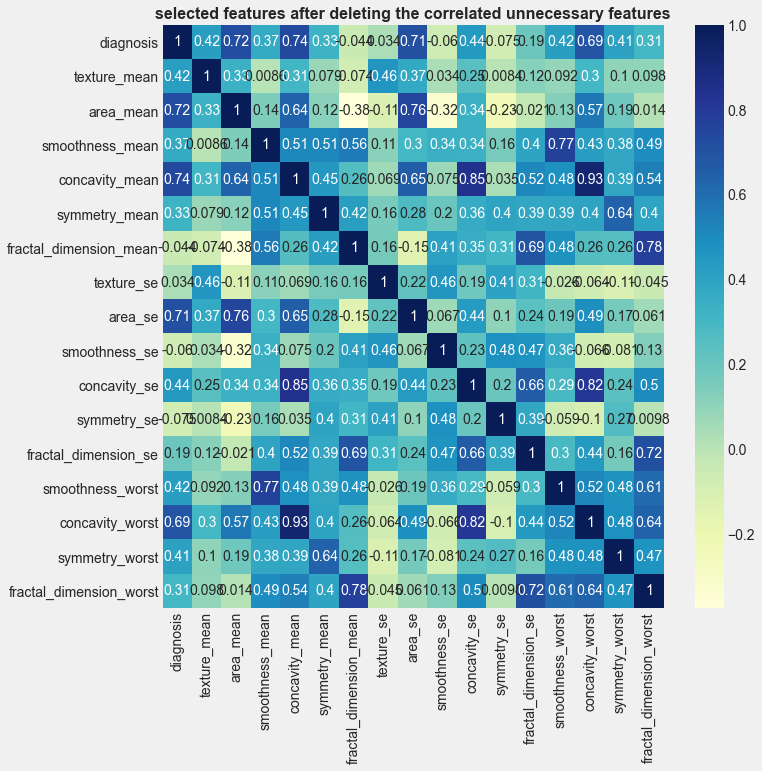

In [286]:

drop_list1 = ['radius_mean','perimeter_mean','compactness_mean','concave points_mean',
              'radius_se','perimeter_se','compactness_se','concave points_se',
              'radius_worst','perimeter_worst','compactness_worst','concave points_worst',
              'texture_worst','area_worst']
              
x_1 = df.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 

plt.figure(figsize=(10,10))
sns.heatmap(x_1.corr(), cmap='YlGnBu', annot = True)
plt.title("selected features after deleting the correlated unnecessary features", fontweight = "bold", fontsize=16)



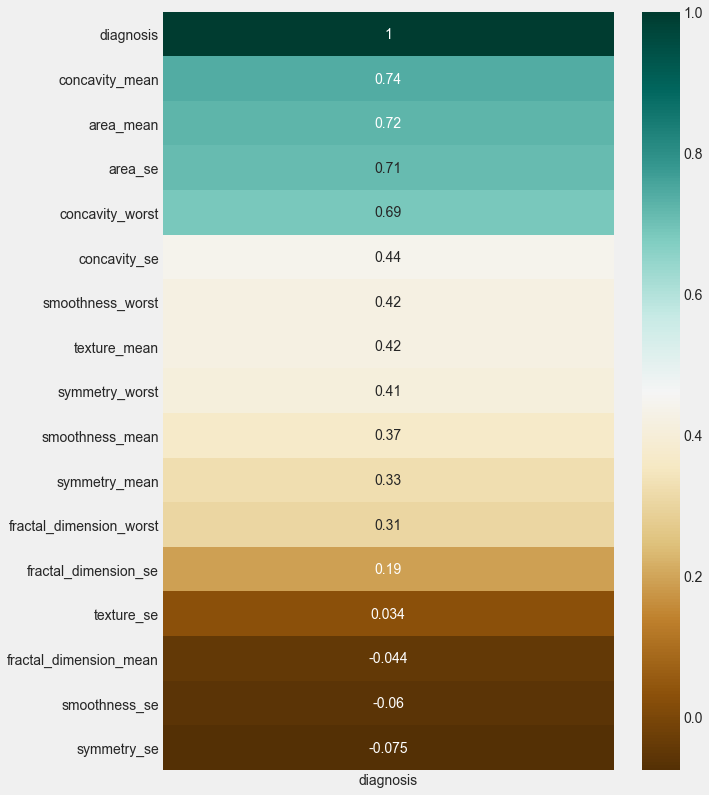

In [287]:

plt.subplots(figsize = (9,13))
sns.heatmap(x_1.corr()[['diagnosis']].sort_values(by='diagnosis', ascending=False), annot=True, cmap='BrBG')




In [288]:


corr_matrix = x_1.corr()
threshold = 0.50
filtre = np.abs(corr_matrix["diagnosis"]) < threshold
corr_features = corr_matrix.columns[filtre].tolist()


Cor_df = x_1.drop(corr_features,axis = 1 )        #  we will use the old dataset later 




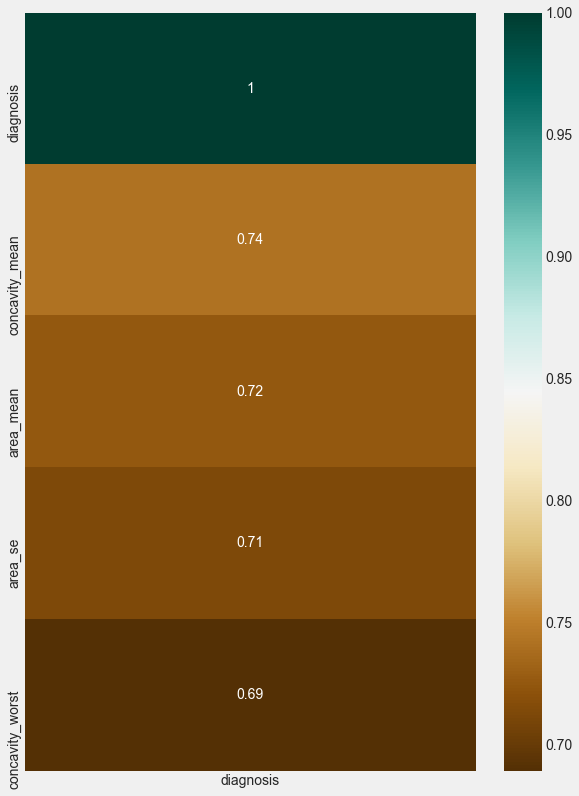

In [289]:


plt.subplots(figsize = (9,13))
sns.heatmap(Cor_df.corr()[['diagnosis']].sort_values(by='diagnosis', ascending=False), annot=True, cmap='BrBG')
 

Text(0.5, 1.0, 'the most correlated features with the target ')

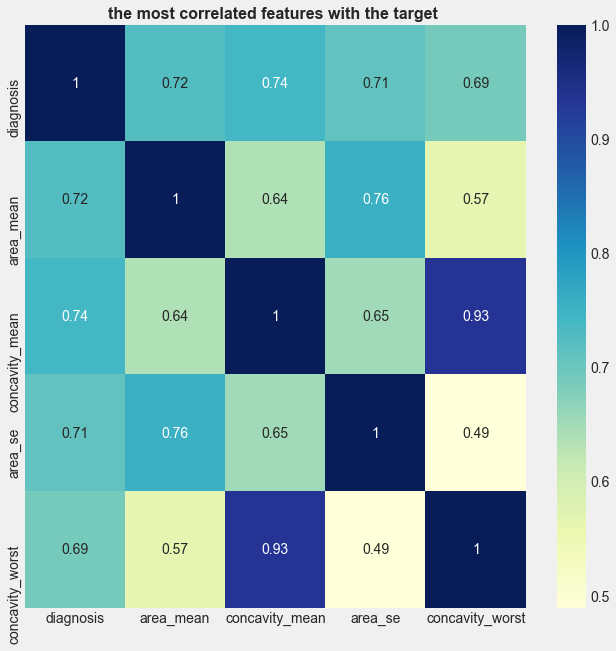

In [290]:
   
plt.figure(figsize=(10,10))
sns.heatmap(Cor_df.corr(), cmap='YlGnBu', annot = True)
plt.title("the most correlated features with the target ", fontweight = "bold", fontsize=16)


In [291]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score

#for model building
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score


In [292]:
y = Cor_df.diagnosis   

Cor_df = Cor_df.drop('diagnosis',axis = 1 )




In [293]:
Cor_df.head()

area_mean  concavity_mean   area_se  concavity_worst
0   3.502532        0.099930  1.751070         0.329978
1   3.559907        0.058443  1.690868         0.175798
2   3.540450        0.088651  1.713133         0.262666
3   3.278973        0.094639  1.561866         0.324862
4   3.555525        0.088748  1.713514         0.245195

In [294]:
x_train, x_test, y_train, y_test = train_test_split(Cor_df, y, test_size=0.3, random_state=42)


scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [295]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1     1.379801      2.335729        1.814385   3.502532   
1          1     1.400684      2.793265        1.821226   3.559907   
2          1     1.394031      2.947044        1.819343   3.540450   
3          1     1.297426      2.911060        1.768960   3.278973   
4          1     1.398615      2.609675        1.822614   3.555525   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         0.118400          0.097440        0.099930             0.053693   
1         0.084740          0.054564        0.058443             0.040523   
2         0.109600          0.081022        0.088651             0.051736   
3         0.099782          0.097948        0.094639             0.048512   
4         0.100300          0.074257        0.088748             0.048359   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0       0.105545  ...      1.073374          17.33         1.350790   
1       0.093968  ...      1.072531          23.41         1.347178   
2       0.099490  ...      1.069246          25.53         1.346139   
3       0.108098  ...      1.037534          26.50         1.332921   
4       0.093897  ...      1.066631          16.67         1.346087   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0    2.576504            0.1622           0.239648         0.329978   
1    2.574504            0.1238           0.129145         0.175798   
2    2.565726            0.1444           0.204112         0.262666   
3    2.475456            0.1313           0.255763         0.324862   
4    2.560204            0.1374           0.137439         0.245195   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654        0.157774                 0.033727  
1                0.1860        0.133168                 0.032057  
2                0.2430        0.147358                 0.031937  
3                0.2575        0.135405                 0.034792  
4                0.1625        0.124499                 0.030877  

[5 rows x 31 columns]

Precision: 0.95 
Recall: 0.905 
F1-Score: 0.927 
Accuracy: 94.74000000000001% 



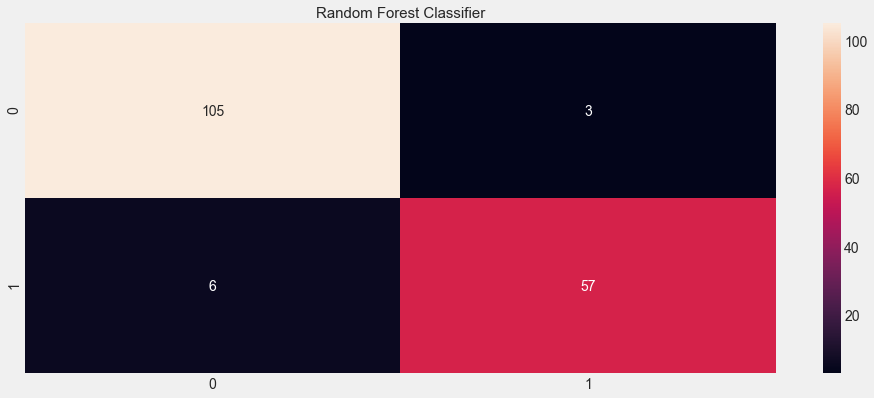

In [296]:




from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score


#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

acc_randomforest= accuracy_score (y_test,clf_rf.predict(x_test))
RoundedAccuracy=round(acc_randomforest, 4)*100
precision, recall, fscore, train_support = score(y_test, clf_rf.predict(x_test), average='binary')

print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), RoundedAccuracy) +"% \n")

cm = confusion_matrix(y_test,clf_rf.predict(x_test))
plt.title("Random Forest Classifier",fontsize=15)

sns.heatmap(cm,annot=True,fmt="d")



Precision: 0.935 
Recall: 0.921 
F1-Score: 0.928 
Accuracy: 94.74000000000001% 



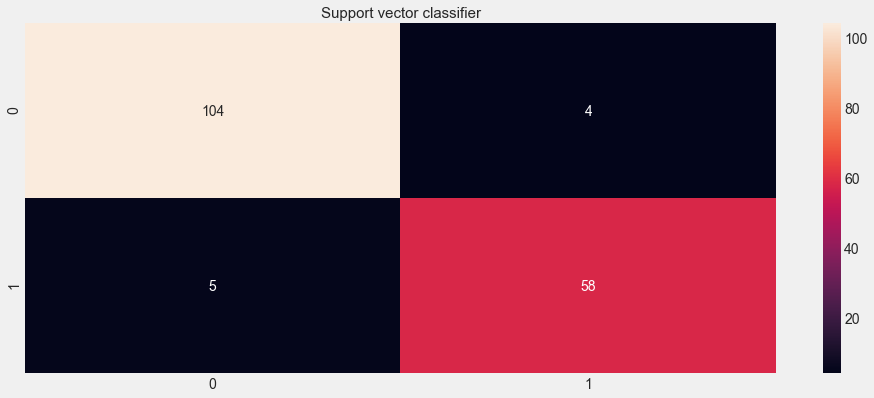

In [297]:

# Support vector classifier
from sklearn.svm import SVC
svc_classifier = SVC()
svc_classifier.fit(x_train, y_train)

acc_svc= accuracy_score (y_test,svc_classifier.predict(x_test))
RoundedAccuracy=round(acc_svc, 4)*100
precision, recall, fscore, train_support = score(y_test, svc_classifier.predict(x_test), average='binary')

print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), RoundedAccuracy) +"% \n")


cm = confusion_matrix(y_test,svc_classifier.predict(x_test))
plt.title("Support vector classifier",fontsize=15)

sns.heatmap(cm,annot=True,fmt="d")



Precision: 0.935 
Recall: 0.921 
F1-Score: 0.928 
Accuracy: 94.74000000000001% 



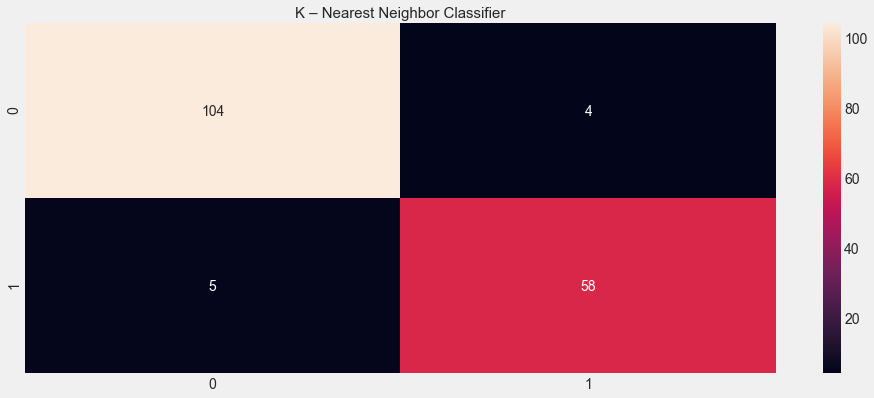

In [298]:


# K – Nearest Neighbor Classifier

from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(x_train, y_train)


acc_knn = accuracy_score(y_test,knn_classifier.predict(x_test))
RoundedAccuracy =round(acc_knn, 4)*100
precision, recall, fscore, train_support = score(y_test, knn_classifier.predict(x_test), average='binary')

print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), RoundedAccuracy) +"% \n")


cm = confusion_matrix(y_test,knn_classifier.predict(x_test))
plt.title("K – Nearest Neighbor Classifier",fontsize=15)

sns.heatmap(cm,annot=True,fmt="d")





Precision: 0.921 
Recall: 0.921 
F1-Score: 0.921 
Accuracy: 94.15% 



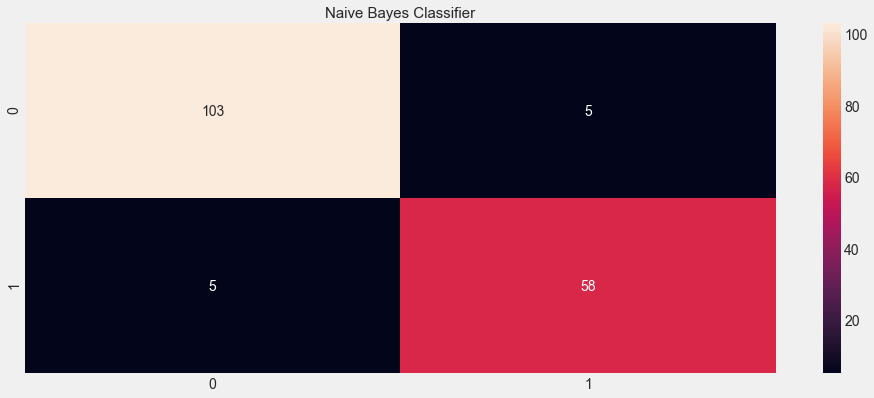

In [299]:

# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)


acc_NBayes = accuracy_score(y_test,nb_classifier.predict(x_test))
RoundedAccuracy =round(acc_NBayes, 4)*100
precision, recall, fscore, train_support = score(y_test, nb_classifier.predict(x_test), average='binary')

print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), RoundedAccuracy) +"% \n")


cm = confusion_matrix(y_test,nb_classifier.predict(x_test))
plt.title("Naive Bayes Classifier",fontsize=15)

sns.heatmap(cm,annot=True,fmt="d")







In [300]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Naiv Bayes',
              'Random Forest'],
    'Score': [acc_svc, acc_knn, acc_NBayes, 
              acc_randomforest]})
models.sort_values(by='Score', ascending=False)


Model     Score
0  Support Vector Machines  0.947368
1                      KNN  0.947368
3            Random Forest  0.947368
2               Naiv Bayes  0.941520

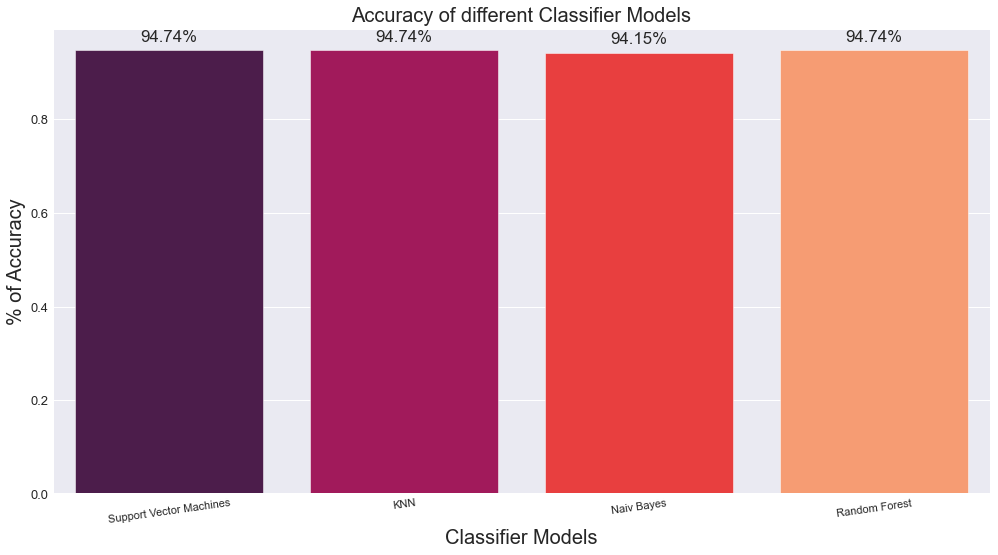

In [301]:


plt.rcParams['figure.figsize']=15,8 
sns.set_style("darkgrid")
ax = sns.barplot(x=models.Model, y=models.Score, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'large')
plt.show()


In [459]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel





y=df['diagnosis']
x = df.drop('diagnosis',axis = 1 )

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=8, step=1)
rfe = rfe.fit(x_train, y_train)

In [460]:
print('Chosen best feature by rfe:',x_train.columns[rfe.support_])

Chosen best feature by rfe: Index(['area_mean', 'concavity_mean', 'concave points_mean', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')


In [461]:

Best8=['area_mean', 'concavity_mean', 'concave points_mean', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst']



In [462]:
dfbest=df[Best8]
dfbest.head()


area_mean  concavity_mean  concave points_mean  radius_worst  \
0   3.502532        0.099930             0.053693      1.073374   
1   3.559907        0.058443             0.040523      1.072531   
2   3.540450        0.088651             0.051736      1.069246   
3   3.278973        0.094639             0.048512      1.037534   
4   3.555525        0.088748             0.048359      1.066631   

   texture_worst  perimeter_worst  area_worst  concave points_worst  
0          17.33         1.350790    2.576504                0.2654  
1          23.41         1.347178    2.574504                0.1860  
2          25.53         1.346139    2.565726                0.2430  
3          26.50         1.332921    2.475456                0.2575  
4          16.67         1.346087    2.560204                0.1625

In [463]:
x_train, x_test, y_train, y_test = train_test_split(dfbest, y, test_size=0.3, random_state=42)


In [464]:

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Precision: 0.967 
Recall: 0.937 
F1-Score: 0.952 
Accuracy: 96.49% 



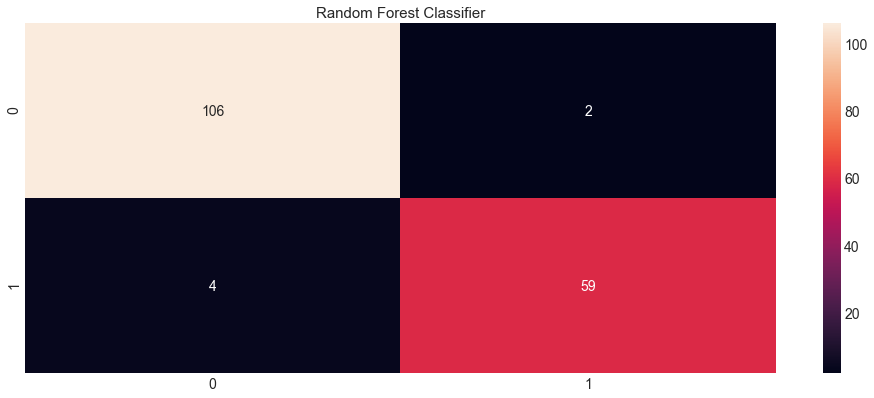

In [466]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score


#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

acc_randomforest= accuracy_score (y_test,clf_rf.predict(x_test))
RoundedAccuracy=round(acc_randomforest, 4)*100
precision, recall, fscore, train_support = score(y_test, clf_rf.predict(x_test), average='binary')

print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), RoundedAccuracy) +"% \n")

cm = confusion_matrix(y_test,clf_rf.predict(x_test))
plt.title("Random Forest Classifier",fontsize=15)

sns.heatmap(cm,annot=True,fmt="d")



Precision: 0.984 
Recall: 0.968 
F1-Score: 0.976 
Accuracy: 98.25% 



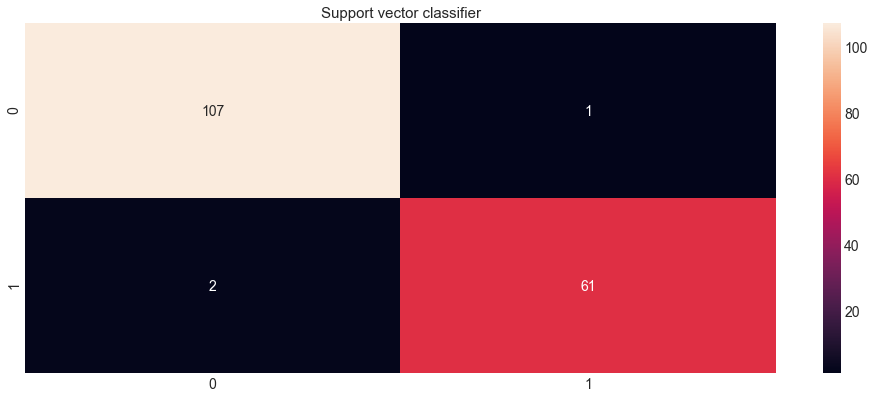

In [467]:

# Support vector classifier
from sklearn.svm import SVC
svc_classifier = SVC()
svc_classifier.fit(x_train, y_train)

acc_svc= accuracy_score (y_test,svc_classifier.predict(x_test))
RoundedAccuracy=round(acc_svc, 4)*100
precision, recall, fscore, train_support = score(y_test, svc_classifier.predict(x_test), average='binary')

print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), RoundedAccuracy) +"% \n")


cm = confusion_matrix(y_test,svc_classifier.predict(x_test))
plt.title("Support vector classifier",fontsize=15)

sns.heatmap(cm,annot=True,fmt="d")



Precision: 0.984 
Recall: 0.952 
F1-Score: 0.968 
Accuracy: 97.66% 



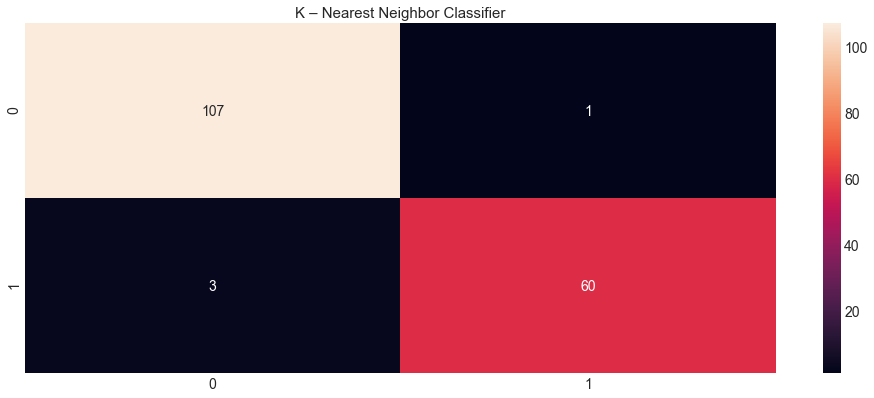

In [468]:


# K – Nearest Neighbor Classifier

from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(x_train, y_train)


acc_knn = accuracy_score(y_test,knn_classifier.predict(x_test))
RoundedAccuracy =round(acc_knn, 4)*100
precision, recall, fscore, train_support = score(y_test, knn_classifier.predict(x_test), average='binary')

print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), RoundedAccuracy) +"% \n")


cm = confusion_matrix(y_test,knn_classifier.predict(x_test))
plt.title("K – Nearest Neighbor Classifier",fontsize=15)

sns.heatmap(cm,annot=True,fmt="d")





Precision: 0.925 
Recall: 0.984 
F1-Score: 0.954 
Accuracy: 96.49% 



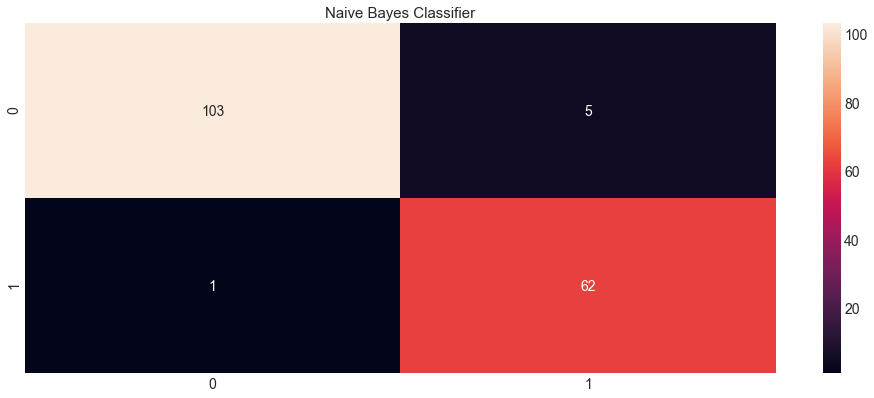

In [469]:

# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)


acc_NBayes = accuracy_score(y_test,nb_classifier.predict(x_test))
RoundedAccuracy =round(acc_NBayes, 4)*100
precision, recall, fscore, train_support = score(y_test, nb_classifier.predict(x_test), average='binary')

print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), RoundedAccuracy) +"% \n")


cm = confusion_matrix(y_test,nb_classifier.predict(x_test))
plt.title("Naive Bayes Classifier",fontsize=15)

sns.heatmap(cm,annot=True,fmt="d")







In [470]:



models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Naiv Bayes',
              'Random Forest'],
    'Score': [acc_svc, acc_knn, acc_NBayes, 
              acc_randomforest]})
models.sort_values(by='Score', ascending=False)



Model     Score
0  Support Vector Machines  0.982456
1                      KNN  0.976608
2               Naiv Bayes  0.964912
3            Random Forest  0.964912

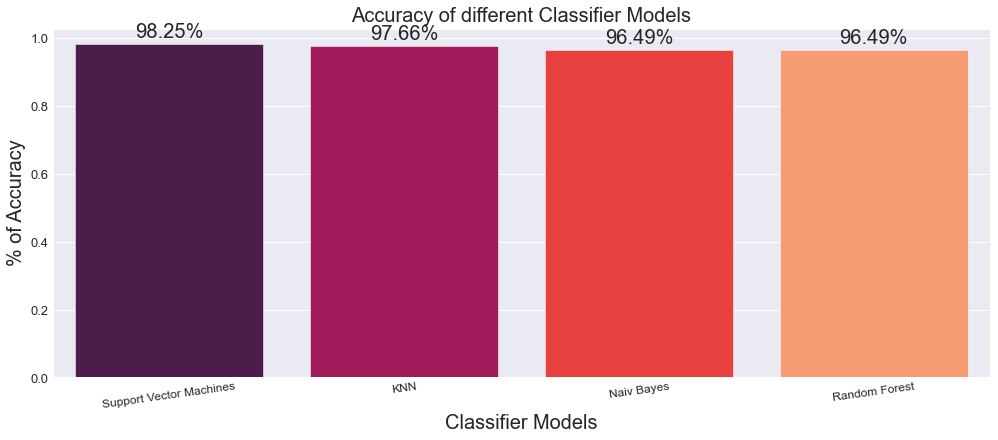

In [471]:

plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")
ax = sns.barplot(x=models.Model, y=models.Score, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()
